# Time series Analysis: Forecasting OPEC Crude Oil Price

## Contents

Installing Nasdaq (prevously Quandl) library<br>
Importing libraries<br>
Resetting library settings<br>
Configuring the API key<br>
Removing gaps in the time series<br>
Smoothing the data with rolling average<br>
Decomposition<br>
 - Decomposing the smoothed time series
 - Decomposing the unsmoothed time series

Testing for stationarity<br>
Testing autocorrelations<br>
Stationarizing the data with differencing<br>
 - Differencing - 1
 - Differencing - 2
 - Differencing - 3
 - Differencing - 4
 - Differencing - 5

Final conclusion<br>

## Installing Nasdaq (prevously Quandl) library

python -m pip install nasdaq-data-link<br>
__or__<br>
conda install quandl<br>
- __to be installed through command prompt__

## Importing libraries

In [1]:
# importing libraries
import nasdaqdatalink
# import quandl
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

## Resetting library settings

In [2]:
# resetting library settings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Confiquring the API key

In [3]:
# configuring the api key
nasdaqdatalink.ApiConfig.api_key = '5-MNQ34z5ySiFTHdCghW'
# quandl.ApiConfig.api_key = '5-MNQ34z5ySiFTHdCghW'

In [4]:
# importing the OPEC crude oil price time series
data = nasdaqdatalink.get('OPEC/ORB')

In [5]:
# checking the imported dataset
data.head(20)

,Value
Date,
2003-01-02,30.05
2003-01-03,30.83
2003-01-06,30.71
2003-01-07,29.72
2003-01-08,28.86
2003-01-09,29.51
2003-01-10,29.82
2003-01-13,29.82
2003-01-14,30.21


There are gaps in the time series

## Removing gaps in the time series

In [6]:
# reindexing time series
data = data.reset_index()
data.columns

Index(['Date', 'Value'], dtype='object')

In [7]:
# creating new index with no gaps
date_cont = pd.date_range(start = data['Date'].min(), end = data['Date'].max())
date_cont

DatetimeIndex(['2003-01-02', '2003-01-03', '2003-01-04', '2003-01-05',
               '2003-01-06', '2003-01-07', '2003-01-08', '2003-01-09',
               '2003-01-10', '2003-01-11',
               ...
               '2022-07-27', '2022-07-28', '2022-07-29', '2022-07-30',
               '2022-07-31', '2022-08-01', '2022-08-02', '2022-08-03',
               '2022-08-04', '2022-08-05'],
              dtype='datetime64[ns]', length=7156, freq='D')

In [8]:
# resetting the index to date range with no gaps
data_filled = data.set_index('Date').reindex(date_cont).fillna(method = 'ffill')
data_filled.head(50)

,Value
2003-01-02,30.05
2003-01-03,30.83
2003-01-04,30.83
2003-01-05,30.83
2003-01-06,30.71
2003-01-07,29.72
2003-01-08,28.86
2003-01-09,29.51
2003-01-10,29.82
2003-01-11,29.82


In [9]:
# checking the column names
data_filled.columns

Index(['Value'], dtype='object')

In [10]:
# checking the type of the object
type(data_filled)

pandas.core.frame.DataFrame

In [11]:
# checking total value counts 
data_filled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7156 entries, 2003-01-02 to 2022-08-05
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   7156 non-null   float64
dtypes: float64(1)
memory usage: 111.8 KB


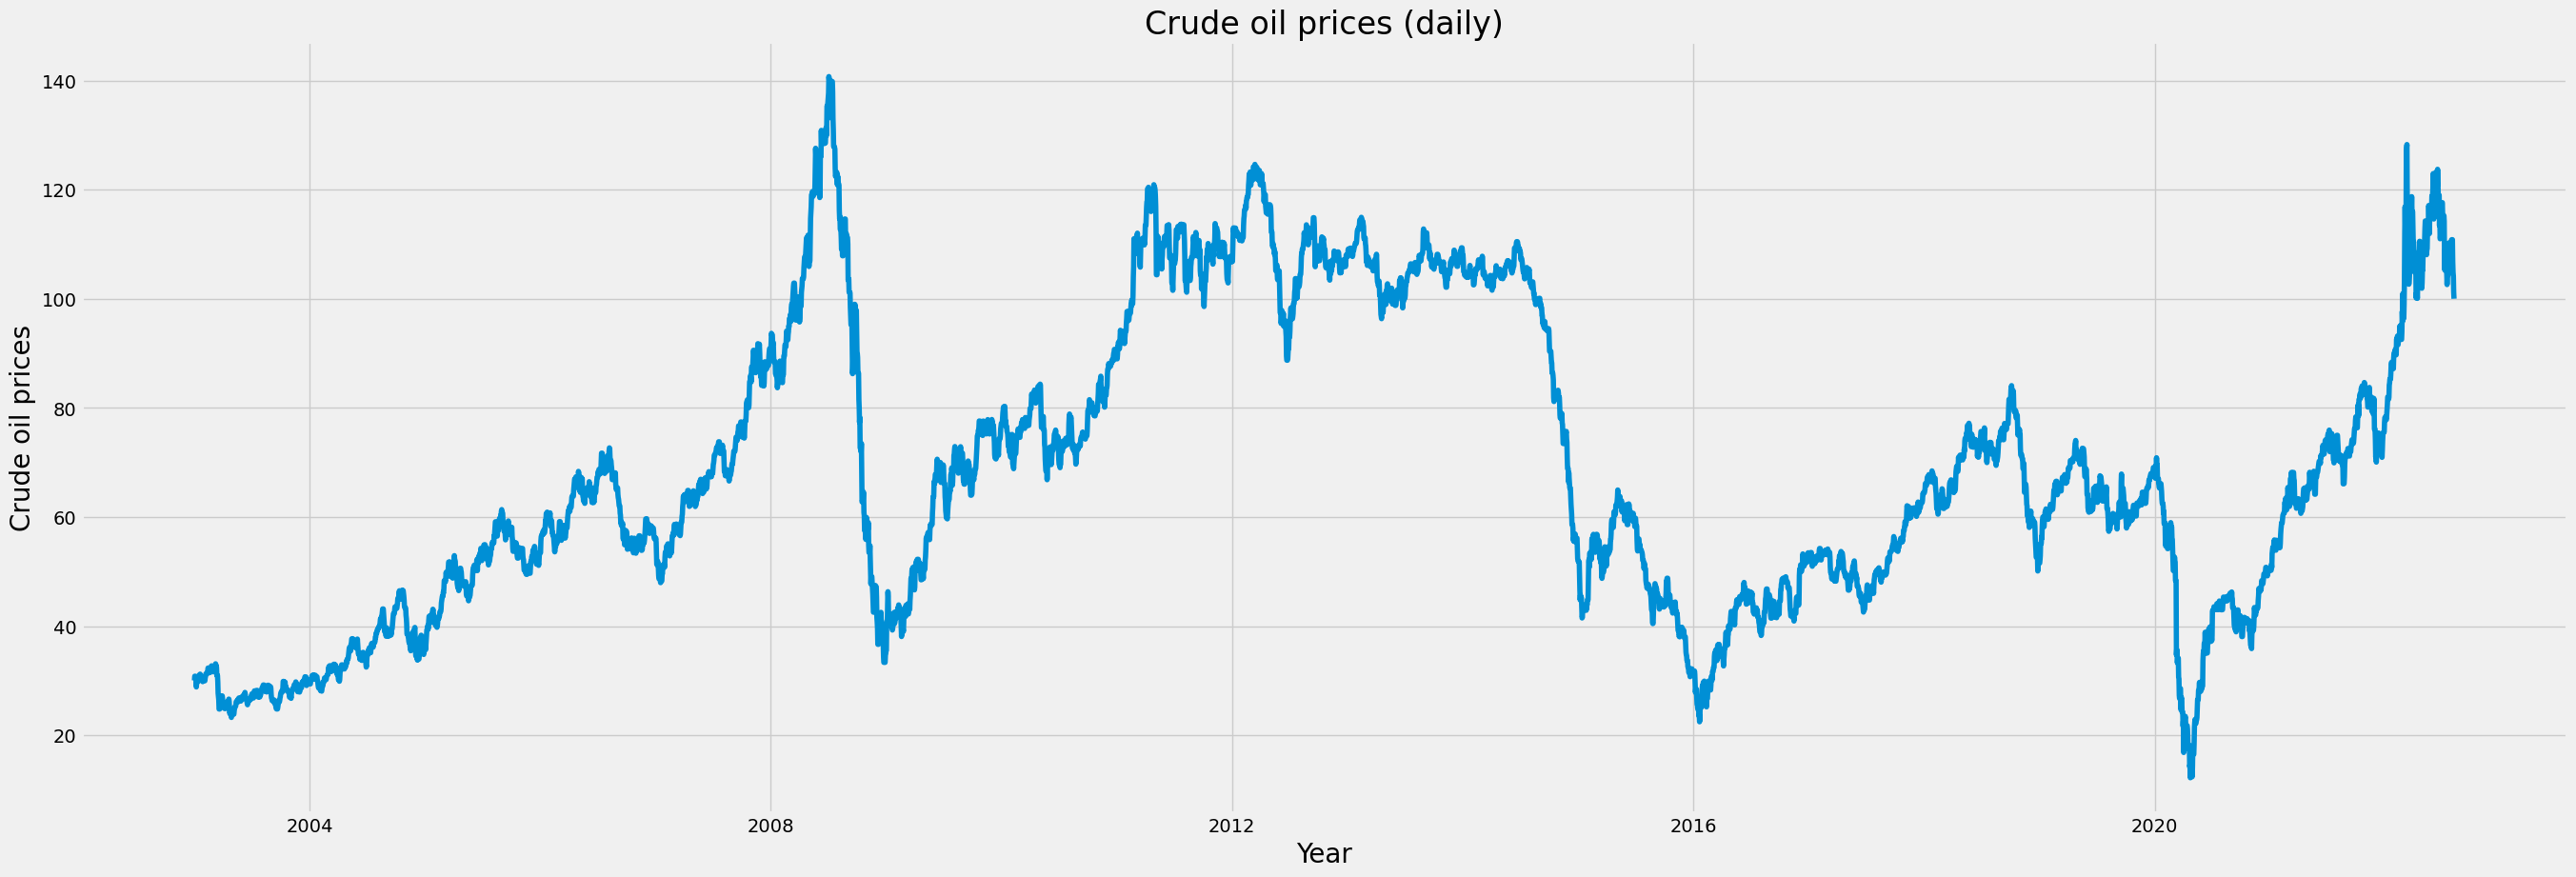

In [12]:
# plotting the data using matplotlib
plt.figure(figsize = (30,10), dpi = 100)
plt.plot(data_filled)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Crude oil prices', fontsize = 20)
plt.title('Crude oil prices (daily)', fontsize = 24)
plt.show()

In [13]:
# checking for null values
data_filled.isnull().sum()

Value    0
dtype: int64

In [14]:
# checking for duplicates
data_check = data_filled.reset_index()
duplicates = data_check.duplicated()
duplicates.sum()

0

No duplicates

## Smoothing the data with rolling average

In [16]:
# creating a quarterly moving average 
ma = data_filled['Value'].rolling(window = 91).mean()
data_filled['moving_average'] = ma
data_filled.head(100)

,Value,moving_average
2003-01-02,30.05,NaN
2003-01-03,30.83,NaN
2003-01-04,30.83,NaN
2003-01-05,30.83,NaN
2003-01-06,30.71,NaN
2003-01-07,29.72,NaN
2003-01-08,28.86,NaN
2003-01-09,29.51,NaN
2003-01-10,29.82,NaN
2003-01-11,29.82,NaN


Text(0.5, 1.0, 'Crude oil prices - actual and quarterly moving average')

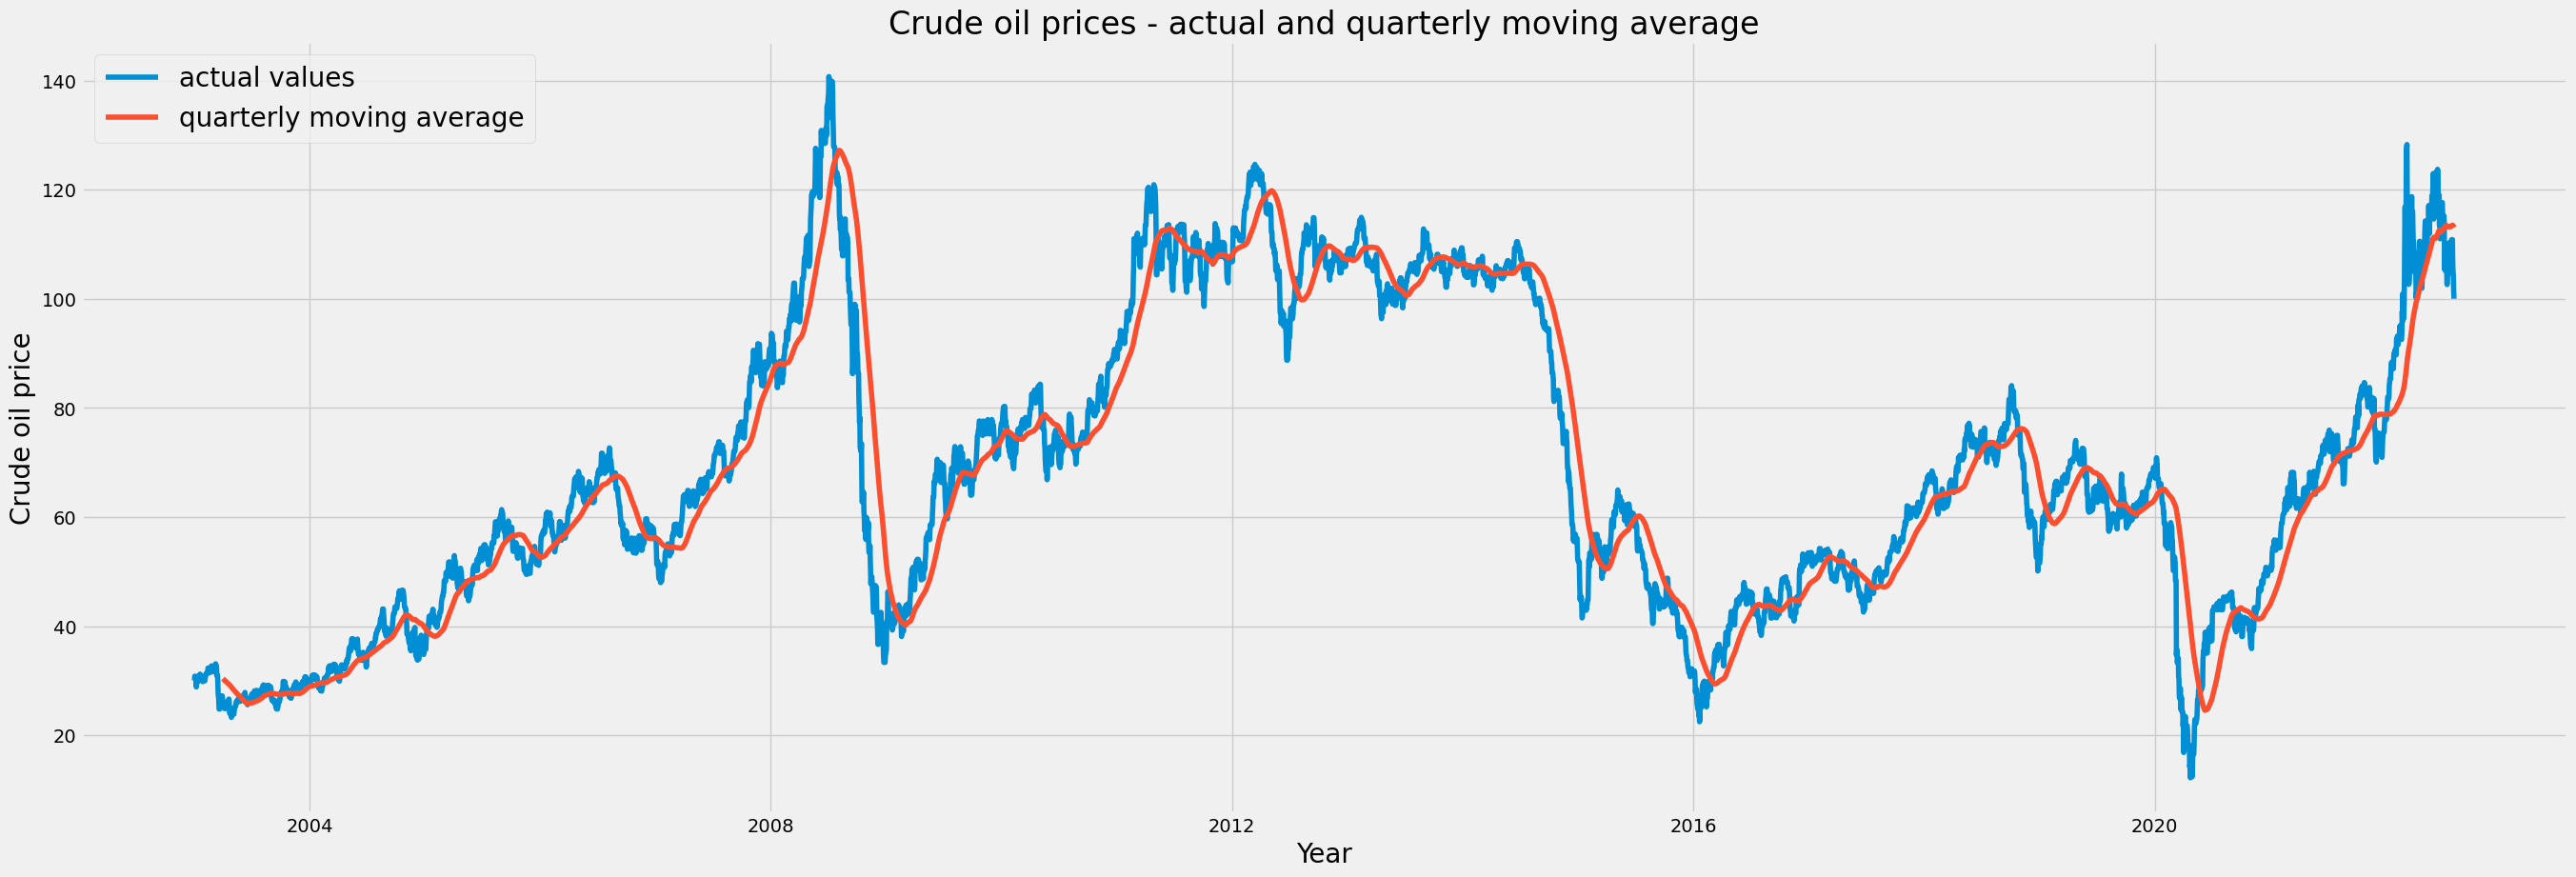

In [18]:
# plotting the data using matplotlib
plt.figure(figsize = (30,10), dpi = 100)
plt.plot(data_filled)
plt.gca().legend(('actual values', 'quarterly moving average'), loc = 'upper left', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Crude oil price', fontsize = 20)
plt.title('Crude oil prices - actual and quarterly moving average', fontsize = 24)

## Decomposition

### Decomposing the smoothed data

In [20]:
# isolating the soothed values
data_decompose = data_filled[~data_filled['moving_average'].isnull() == True]['moving_average']
data_decompose.head(20)

2003-04-02    30.380989
2003-04-03    30.336484
2003-04-04    30.276593
2003-04-05    30.216703
2003-04-06    30.156813
2003-04-07    30.093077
2003-04-08    30.044835
2003-04-09    30.008901
2003-04-10    29.963736
2003-04-11    29.910330
2003-04-12    29.856923
2003-04-13    29.803516
2003-04-14    29.754396
2003-04-15    29.703297
2003-04-16    29.648901
2003-04-17    29.598132
2003-04-18    29.545714
2003-04-19    29.493297
2003-04-20    29.440879
2003-04-21    29.390659
Freq: D, Name: moving_average, dtype: float64

In [21]:
# decomposing the time series using miltiplicative model
decomposition = sm.tsa.seasonal_decompose(x = data_decompose, model = 'multiplicative')

In [22]:
# defining same size for all charts

from pylab import rcParams 
rcParams['figure.figsize'] = 30, 15

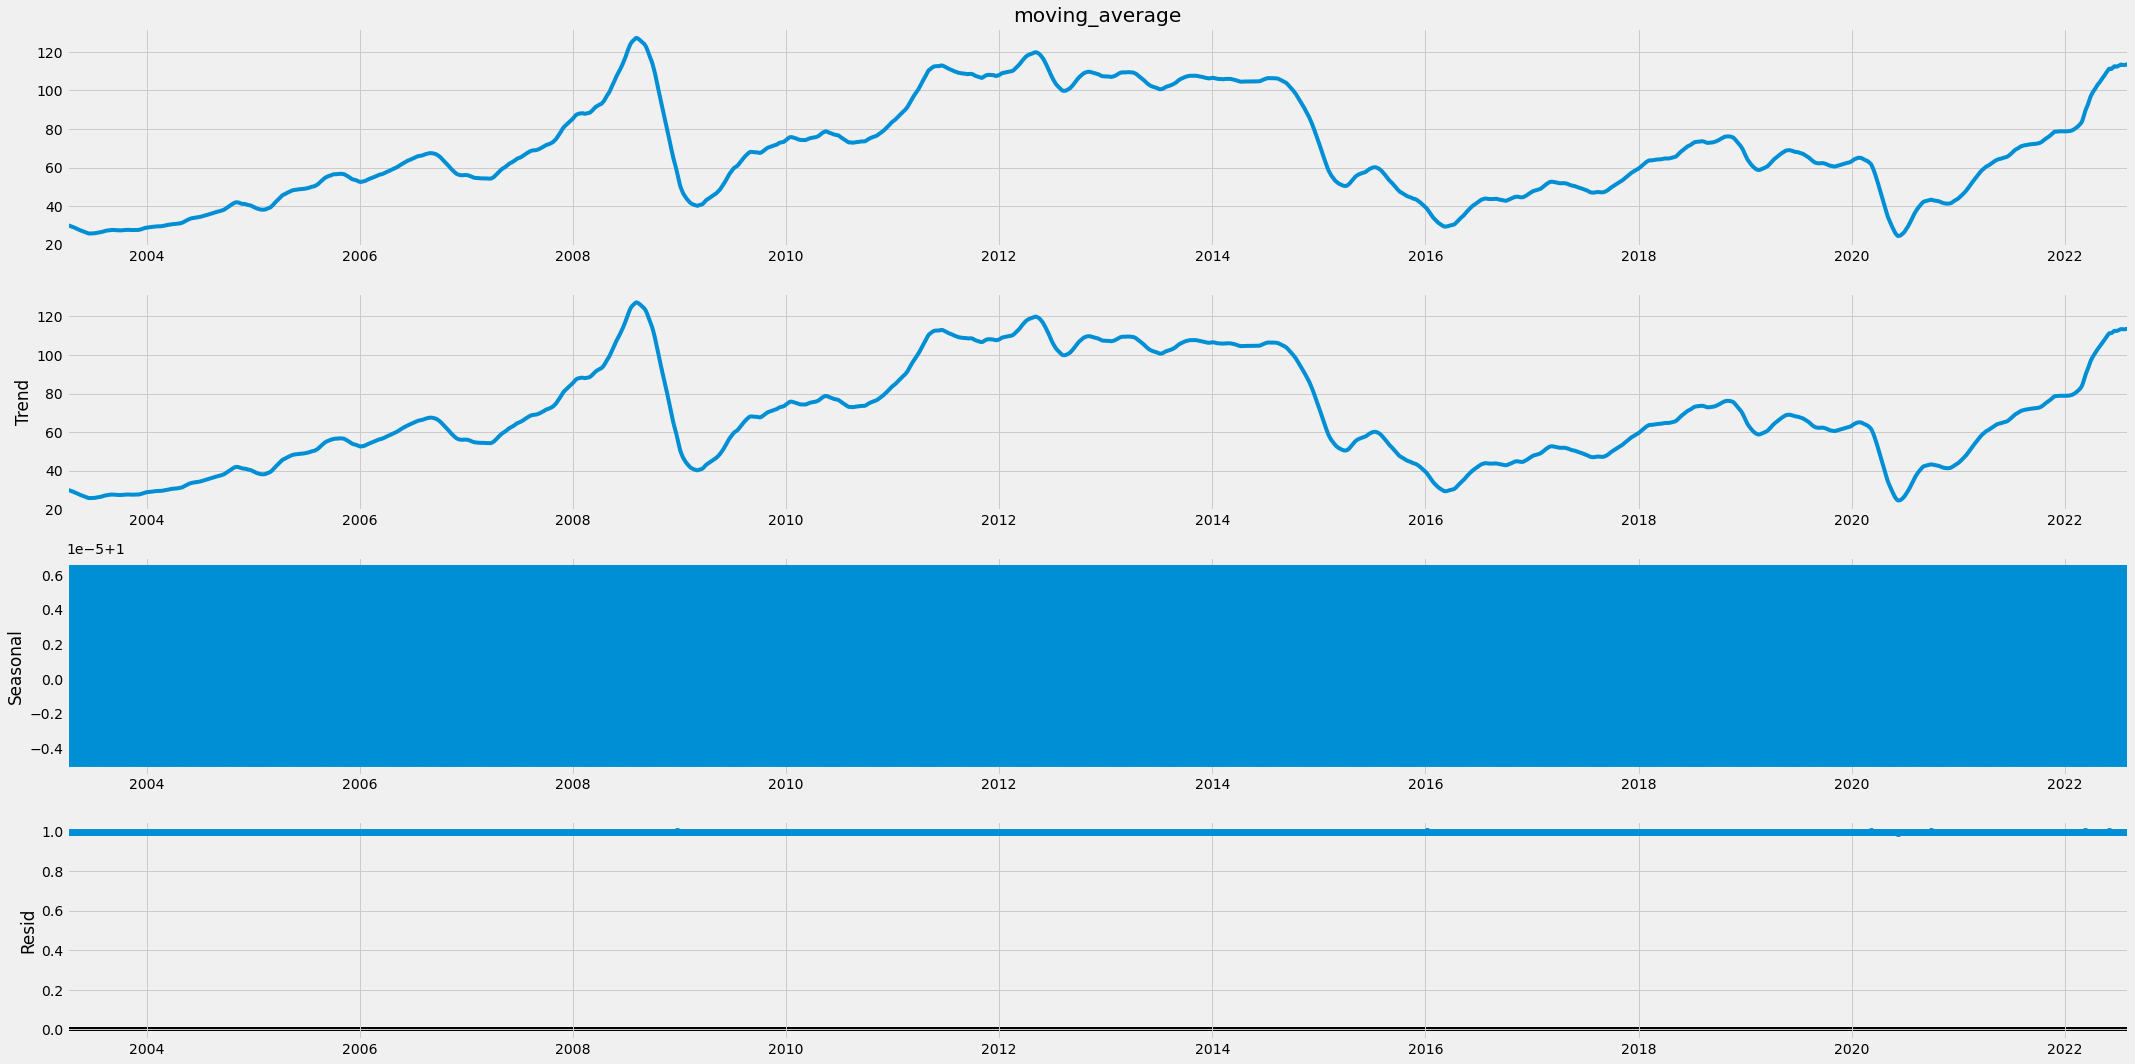

In [23]:
# plotting the separate components
decomposition.plot()
plt.show()

### Decomposing the unsmoothed data

In [24]:
# isolating the unsmoothed data
data_unsmoothed = data_filled['Value']
data_unsmoothed.head(20)

2003-01-02    30.05
2003-01-03    30.83
2003-01-04    30.83
2003-01-05    30.83
2003-01-06    30.71
2003-01-07    29.72
2003-01-08    28.86
2003-01-09    29.51
2003-01-10    29.82
2003-01-11    29.82
2003-01-12    29.82
2003-01-13    29.82
2003-01-14    30.21
2003-01-15    30.66
2003-01-16    30.87
2003-01-17    31.02
2003-01-18    31.02
2003-01-19    31.02
2003-01-20    31.21
2003-01-21    30.90
Freq: D, Name: Value, dtype: float64

In [25]:
# decomposing the time series using miltiplicative model
decomposition_unsmoothed = sm.tsa.seasonal_decompose(x = data_unsmoothed, model = 'multiplicative')

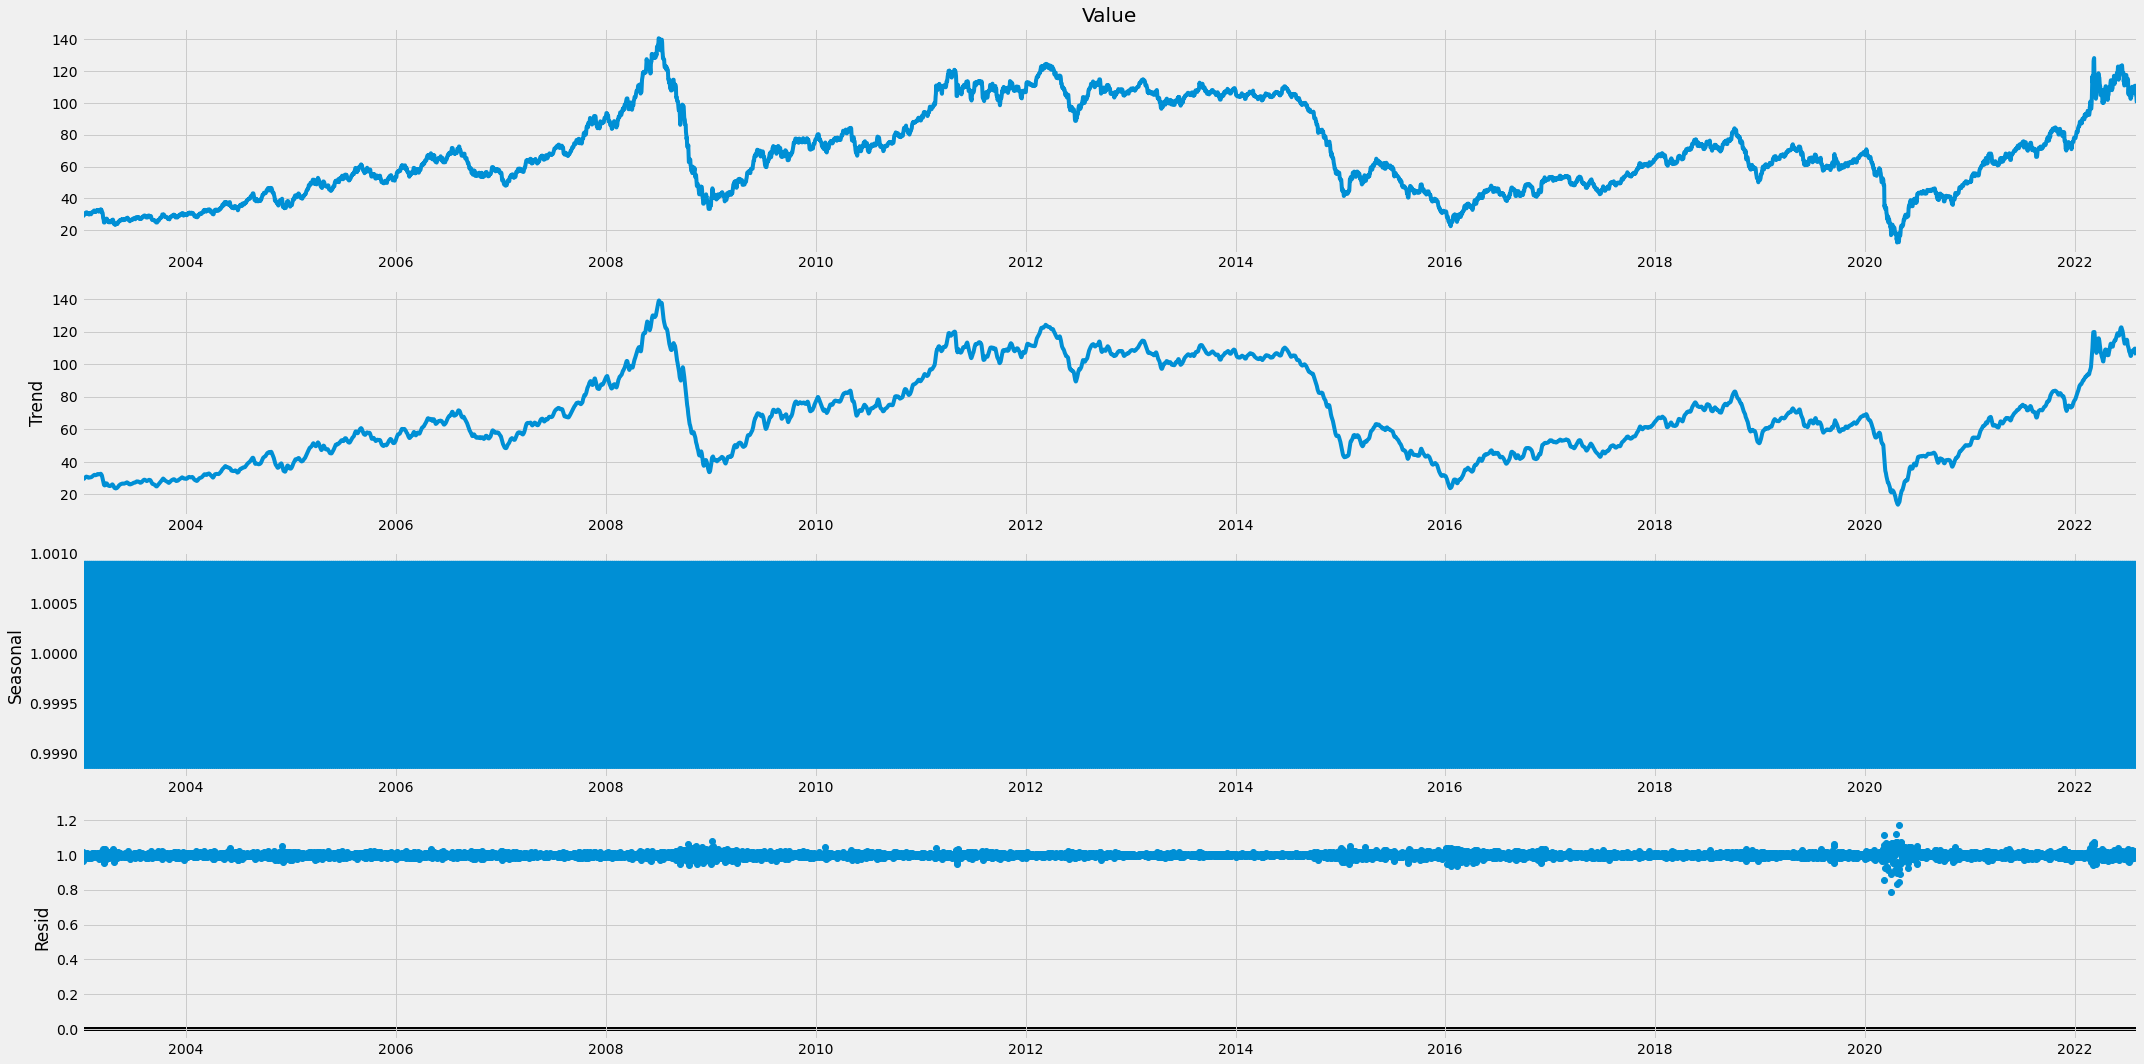

In [27]:
# plotting the separate components
decomposition_unsmoothed.plot()
plt.show()

## Testing for stationarity

In [30]:
# testing the stationarity of the smoothed data
from statsmodels.tsa.stattools import adfuller
def dickey_fuller(timeseries): 
    print ('Dickey Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test statistic', 'p-value', 'Number of lags used', 'Number of observations used'])
    for key, value in test[4].items():
        result['Critical value (%s)'%key] = value
    print(result)
    
# applying the test to the time series
dickey_fuller(data_decompose)

Dickey Fuller Stationarity Test:
Test statistic                   -3.031372
p-value                           0.032067
Number of lags used              29.000000
Number of observations used    7036.000000
Critical value (1%)              -3.431280
Critical value (5%)              -2.861951
Critical value (10%)             -2.566989
dtype: float64


Interpretation of the Dickey Fuller test results:<br>
- At 5% level of significance the Test statistic is smaller than the Critical value<br>
- Ahe p-value is smaller than 0.05<br>

Therefore, the null hypothesis is rejected. Hence, there is no unit root in the data and the data is stationary.

## Testing autocorrelations

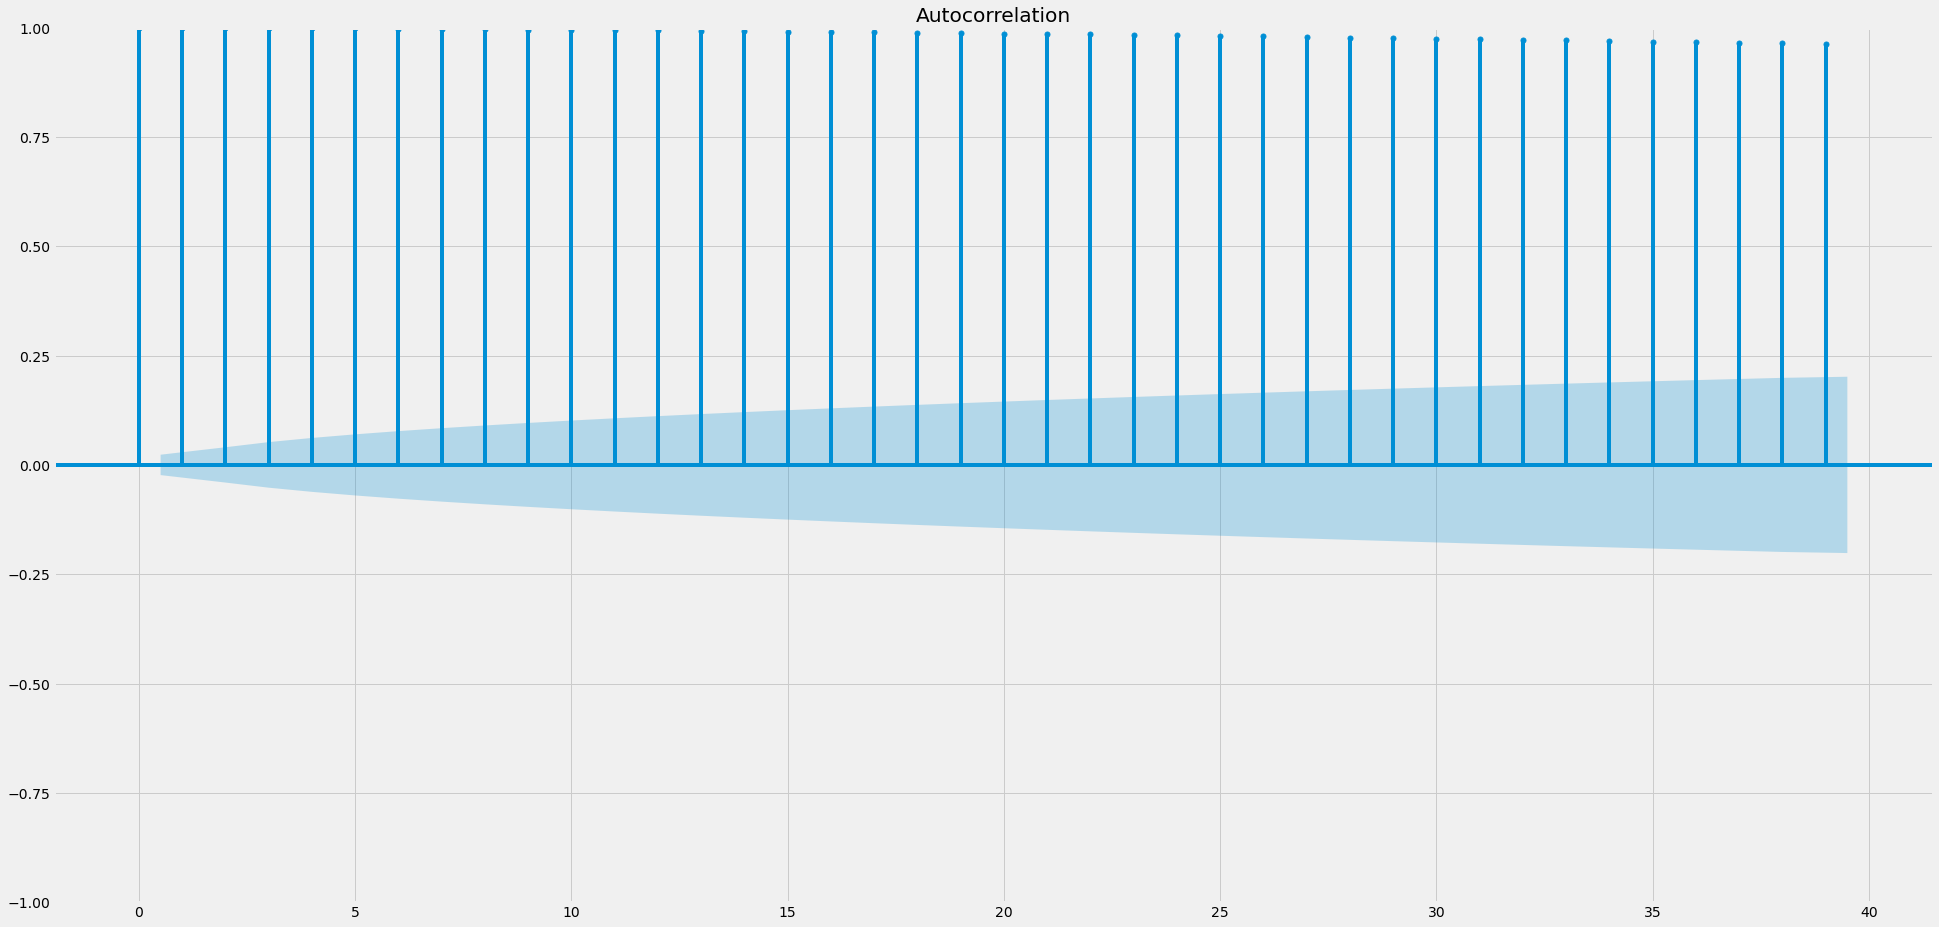

In [31]:
# autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_decompose)
plt.show()

Interpreting the autocorrelation plot:<br>
All the lags are above the confidence interval. Therefore, there is a lot of autocorrelation in the data.

## Stationarizing the data with differencing

### Differencing - 1

In [32]:
# differencing the time series
data_smooth_diff = data_decompose - data_decompose.shift(1)

In [34]:
# cecking the dataframe after differencing
data_smooth_diff.head()

2003-04-02         NaN
2003-04-03   -0.044505
2003-04-04   -0.059890
2003-04-05   -0.059890
2003-04-06   -0.059890
Freq: D, Name: moving_average, dtype: float64

In [33]:
# checking null values
data_smooth_diff.isnull().sum()

1

In [35]:
# removing the null values
data_smooth_diff.dropna(inplace = True)

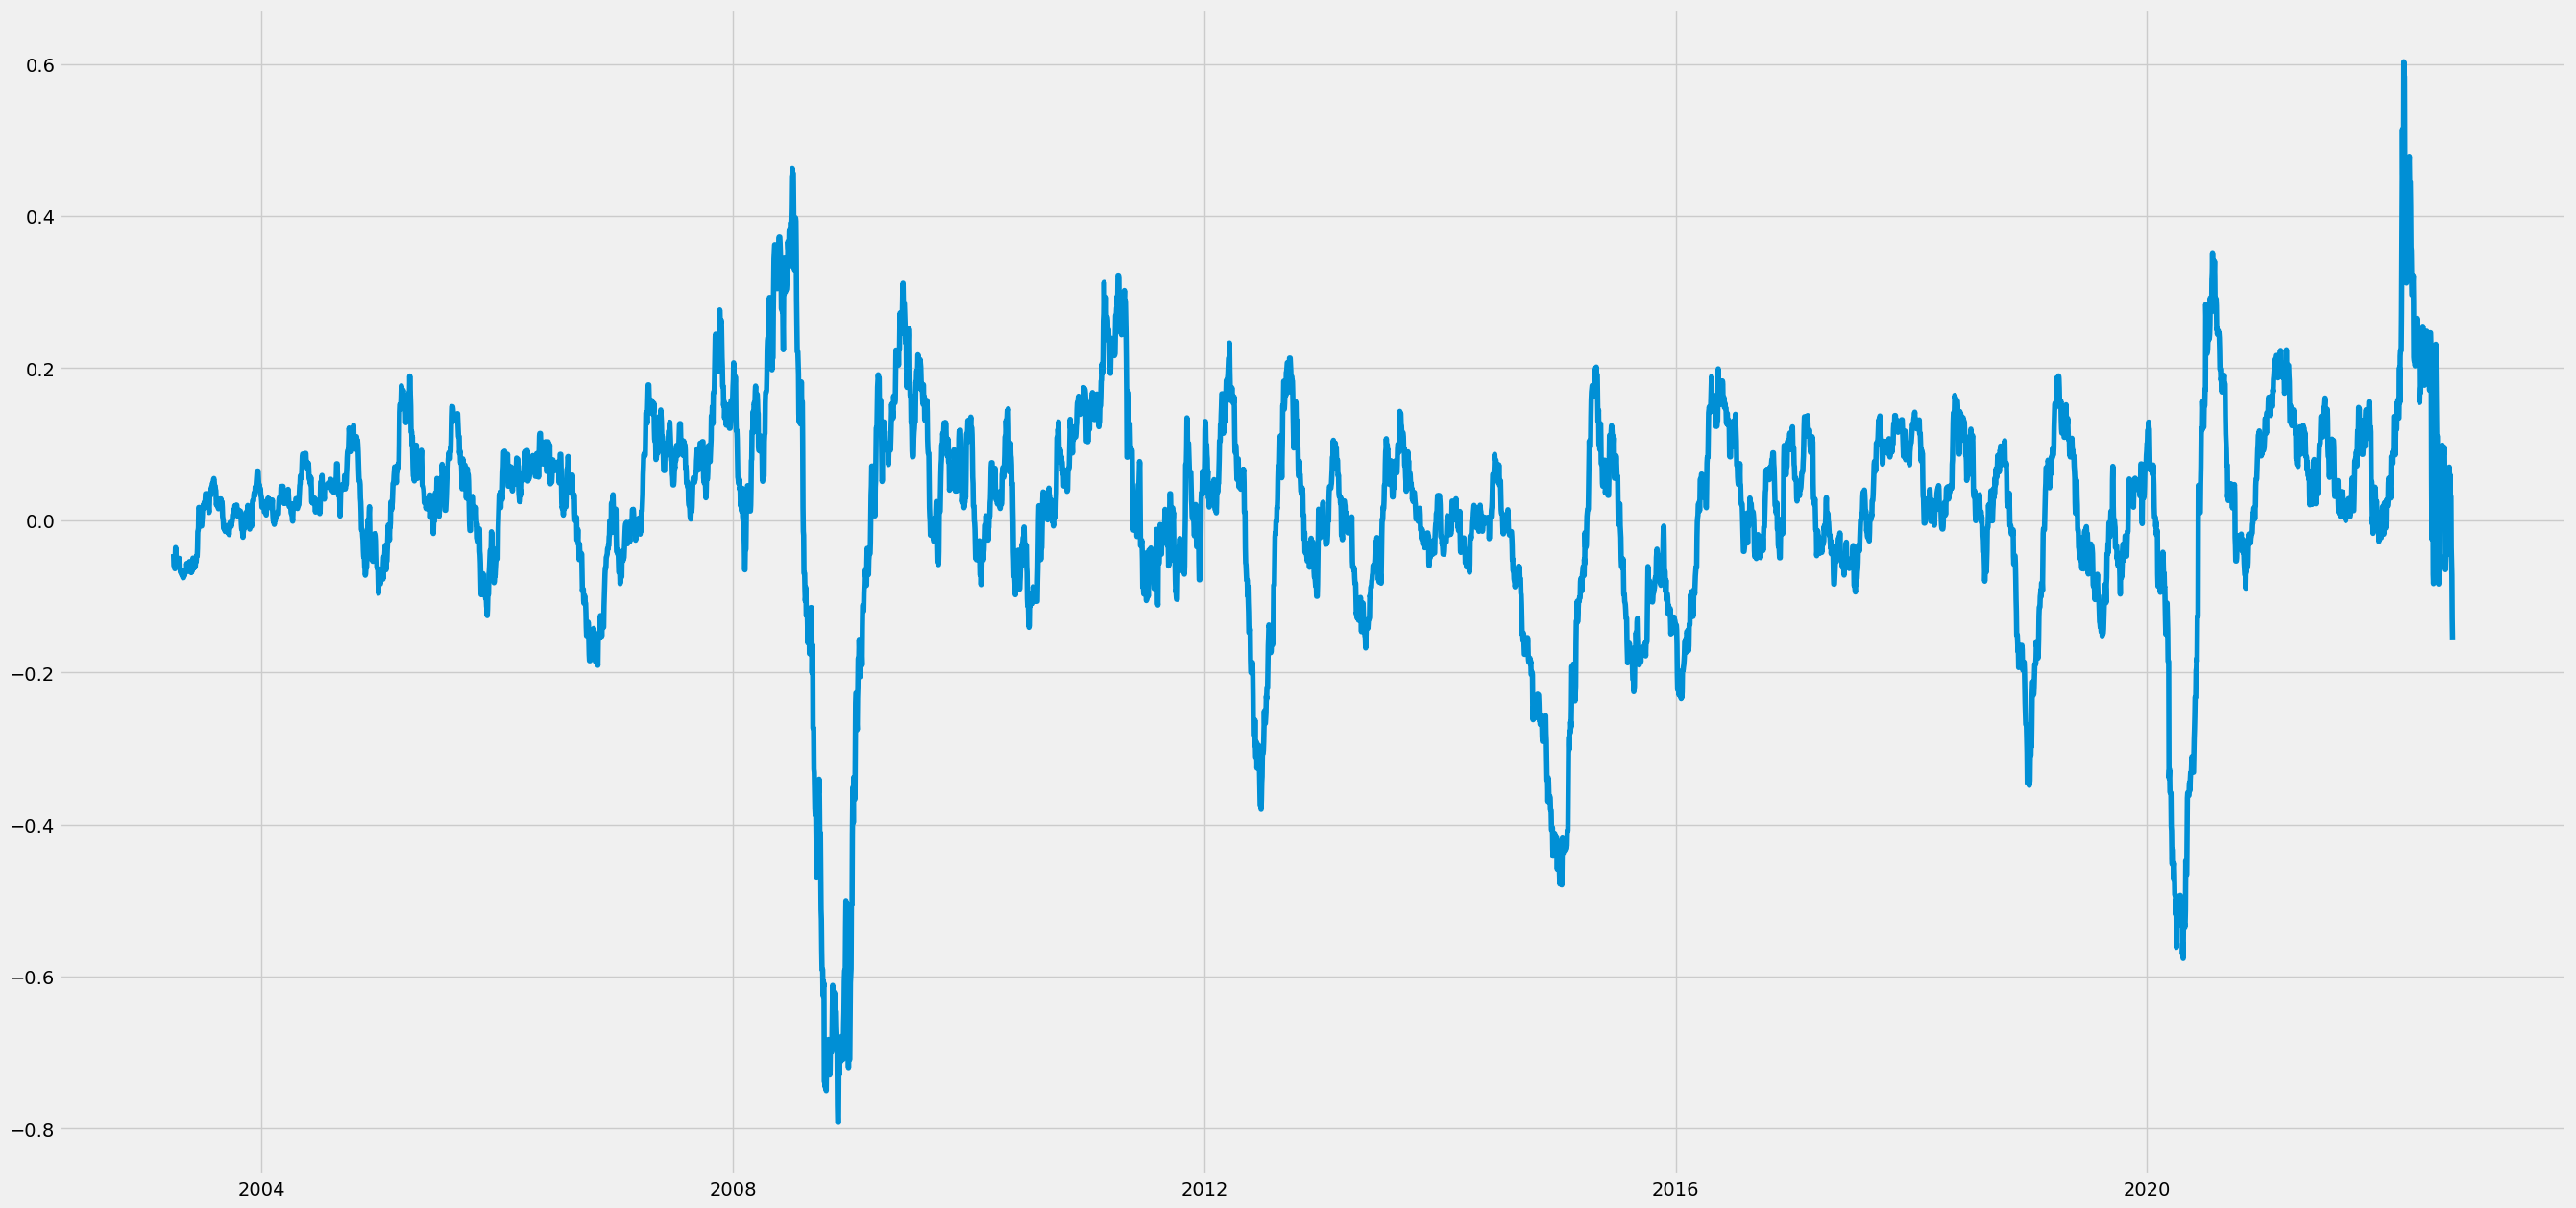

In [36]:
# plotting the data after differencing
plt.figure(figsize = (30,15), dpi = 100)
plt.plot(data_smooth_diff)

In [37]:
# checking dickey fuller test results
dickey_fuller(data_smooth_diff)

Dickey Fuller Stationarity Test:
Test statistic                -7.019731e+00
p-value                        6.590753e-10
Number of lags used            2.800000e+01
Number of observations used    7.036000e+03
Critical value (1%)           -3.431280e+00
Critical value (5%)           -2.861951e+00
Critical value (10%)          -2.566989e+00
dtype: float64


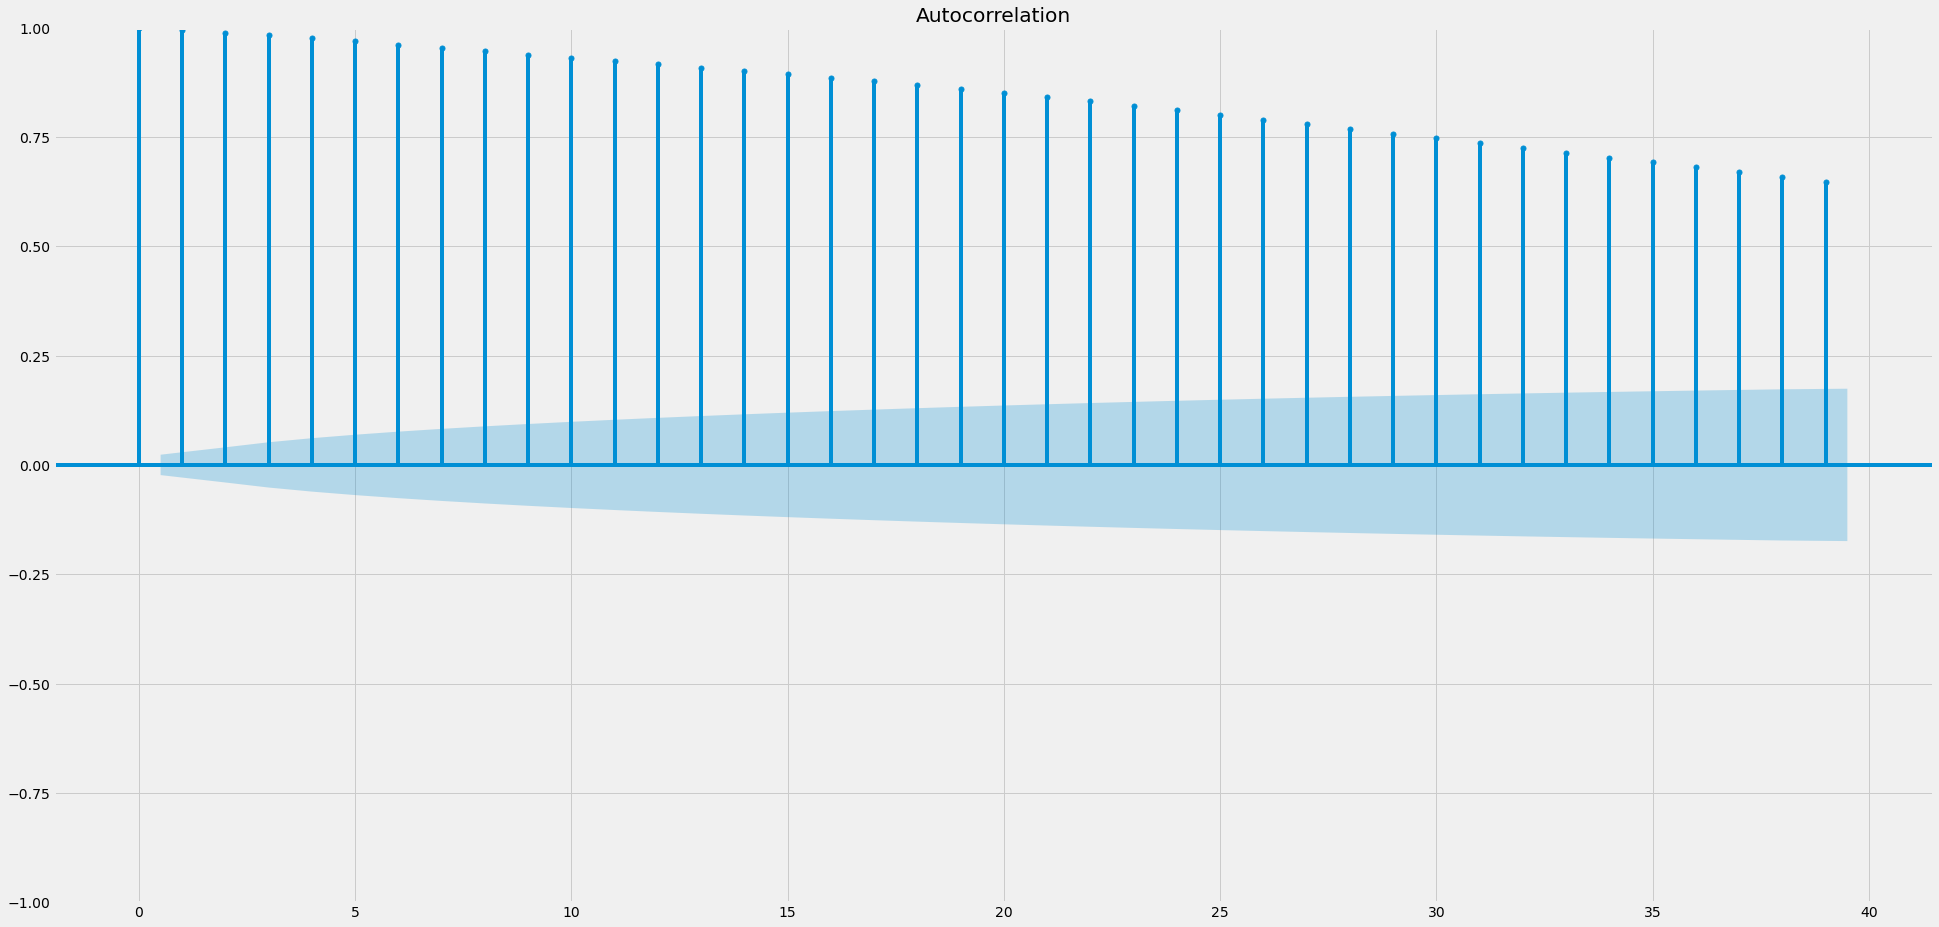

In [38]:
# checking autocorrelation
plot_acf(data_smooth_diff)
plt.show()

### Differencing - 2

In [39]:
# differencing the data for second time
data_diff_v2 = data_smooth_diff - data_smooth_diff.shift(1)
data_diff_v2.dropna(inplace = True)
data_diff_v2.head(20)

2003-04-04   -1.538462e-02
2003-04-05   -3.552714e-15
2003-04-06    3.552714e-15
2003-04-07   -3.846154e-03
2003-04-08    1.549451e-02
2003-04-09    1.230769e-02
2003-04-10   -9.230769e-03
2003-04-11   -8.241758e-03
2003-04-12   -7.105427e-15
2003-04-13    0.000000e+00
2003-04-14    4.285714e-03
2003-04-15   -1.978022e-03
2003-04-16   -3.296703e-03
2003-04-17    3.626374e-03
2003-04-18   -1.648352e-03
2003-04-19    3.552714e-15
2003-04-20   -3.552714e-15
2003-04-21    2.197802e-03
2003-04-22   -9.890110e-04
2003-04-23   -1.197802e-02
Freq: D, Name: moving_average, dtype: float64

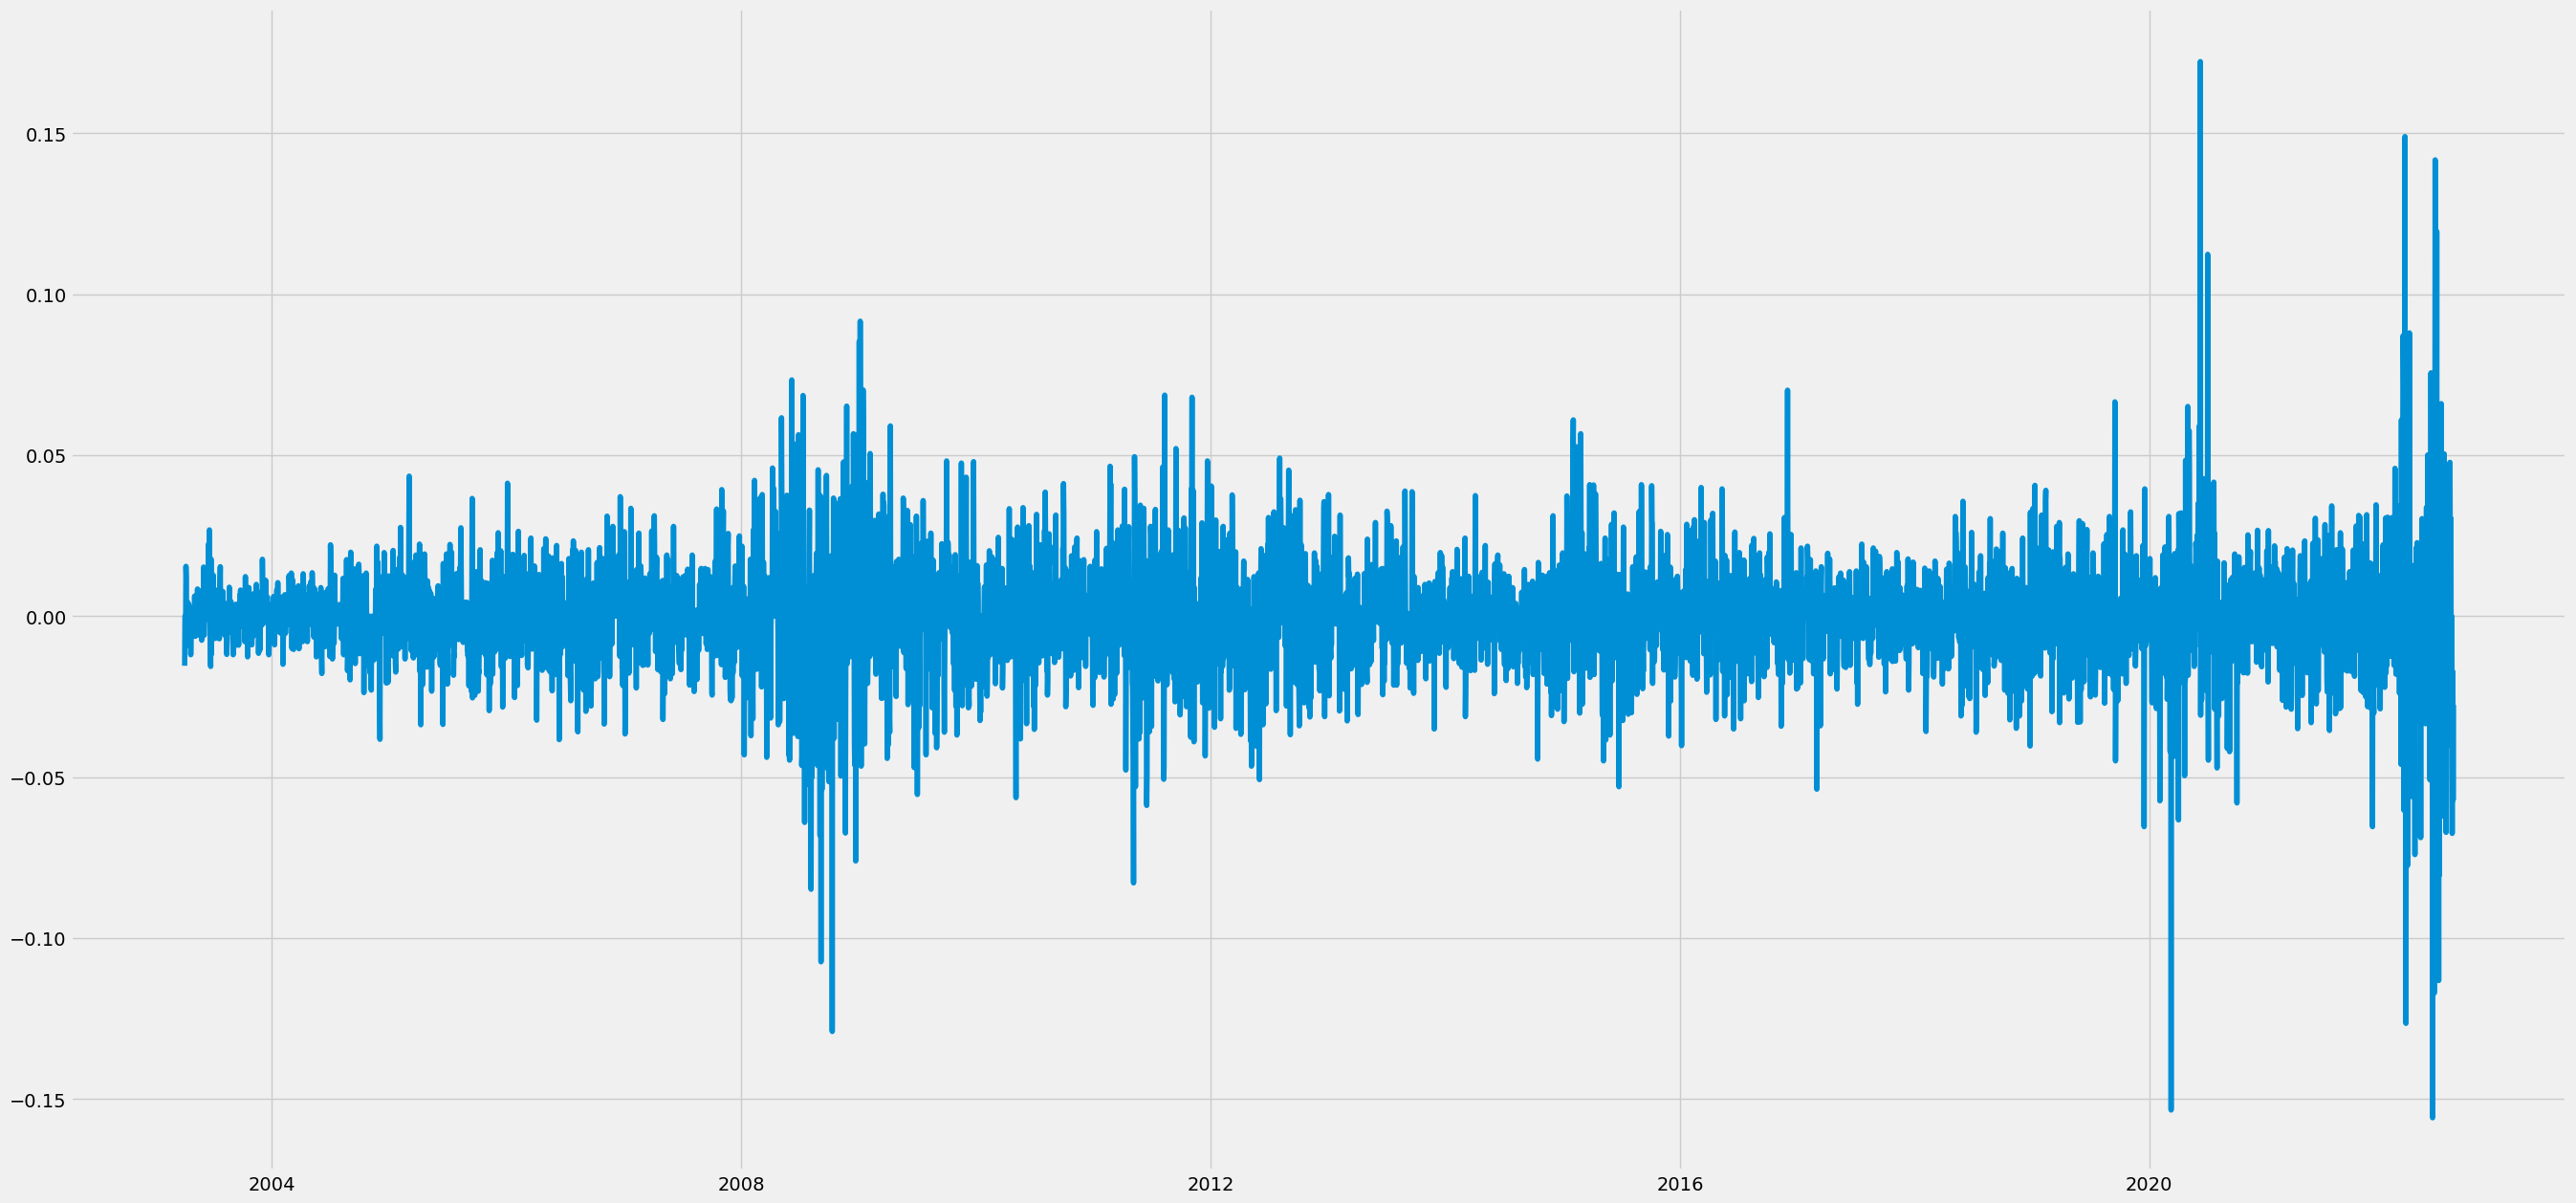

In [40]:
# plotting the data after second differencing
plt.figure(figsize = (30,15), dpi = 100)
plt.plot(data_diff_v2)

In [41]:
# checking dickey fuller test results
dickey_fuller(data_diff_v2)

Dickey Fuller Stationarity Test:
Test statistic                -1.313547e+01
p-value                        1.465278e-24
Number of lags used            2.600000e+01
Number of observations used    7.037000e+03
Critical value (1%)           -3.431280e+00
Critical value (5%)           -2.861951e+00
Critical value (10%)          -2.566989e+00
dtype: float64


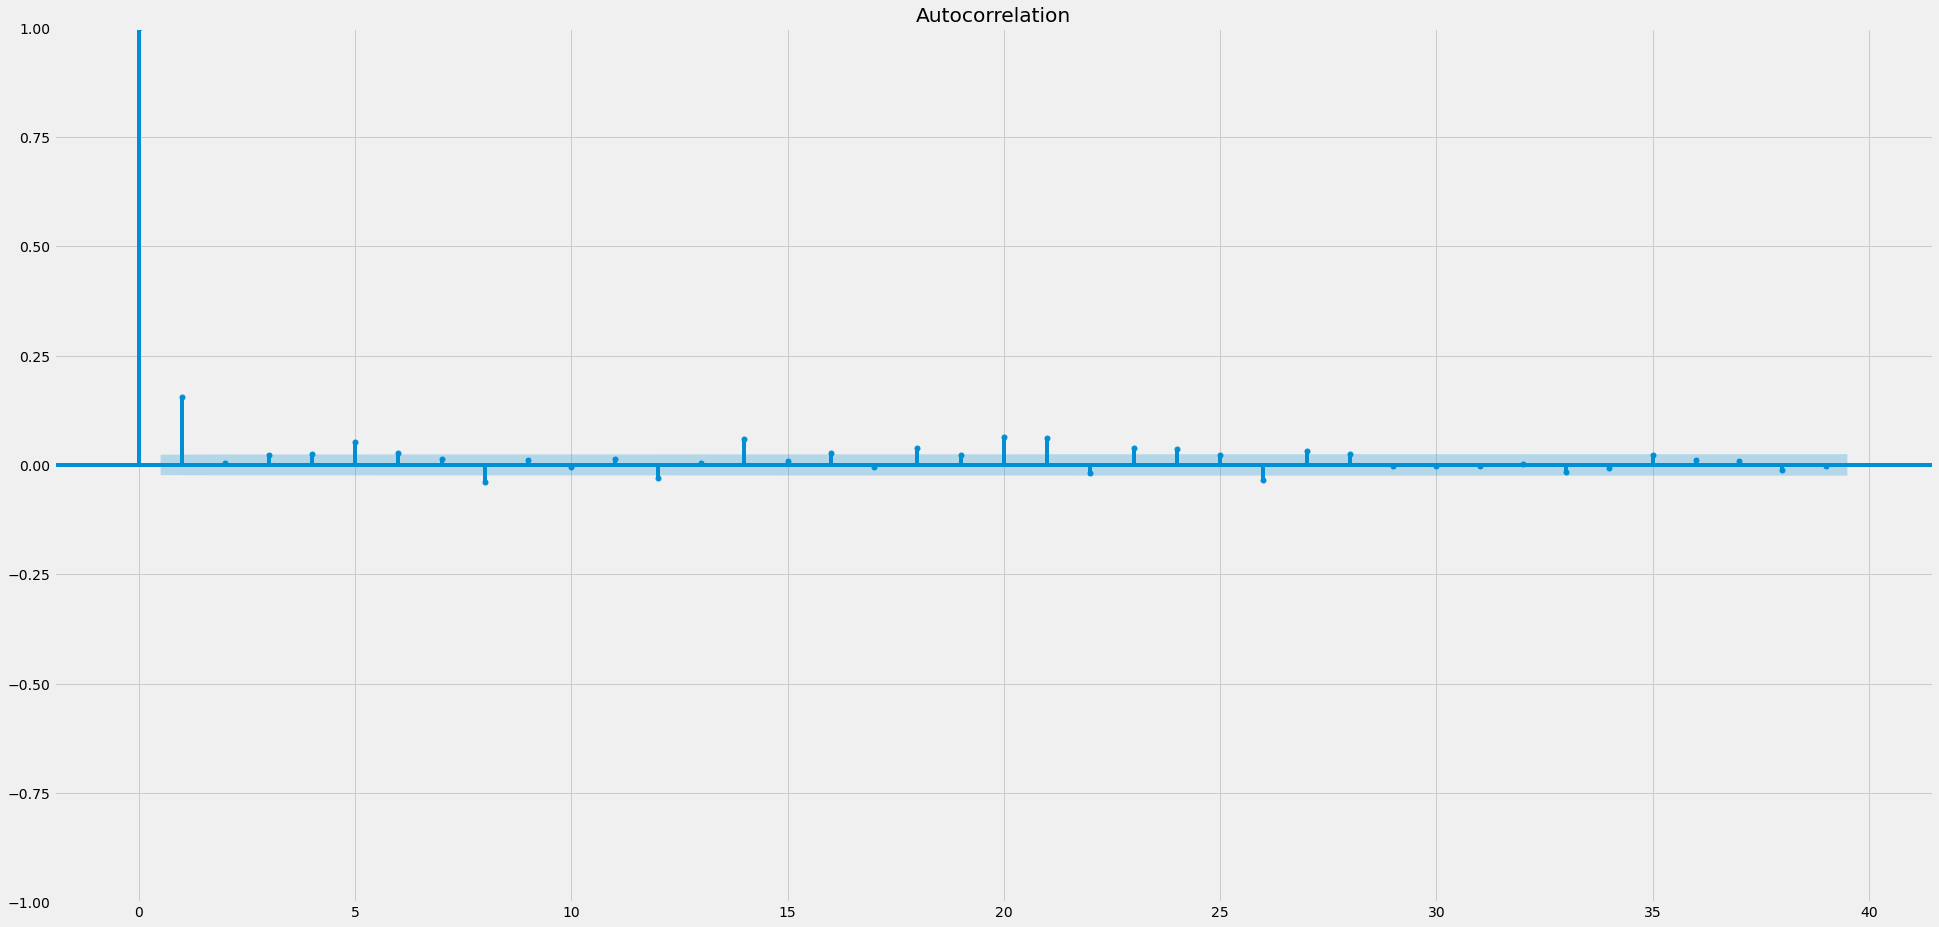

In [42]:
# checking autocorrelation
plot_acf(data_diff_v2)
plt.show()

### Diferencing - 3

In [43]:
# differencing the third time
data_diff_v3 = data_diff_v2 - data_diff_v2.shift(1)
data_diff_v3.dropna(inplace = True)
data_diff_v3.head(20)

2003-04-05    1.538462e-02
2003-04-06    7.105427e-15
2003-04-07   -3.846154e-03
2003-04-08    1.934066e-02
2003-04-09   -3.186813e-03
2003-04-10   -2.153846e-02
2003-04-11    9.890110e-04
2003-04-12    8.241758e-03
2003-04-13    7.105427e-15
2003-04-14    4.285714e-03
2003-04-15   -6.263736e-03
2003-04-16   -1.318681e-03
2003-04-17    6.923077e-03
2003-04-18   -5.274725e-03
2003-04-19    1.648352e-03
2003-04-20   -7.105427e-15
2003-04-21    2.197802e-03
2003-04-22   -3.186813e-03
2003-04-23   -1.098901e-02
2003-04-24    6.923077e-03
Freq: D, Name: moving_average, dtype: float64

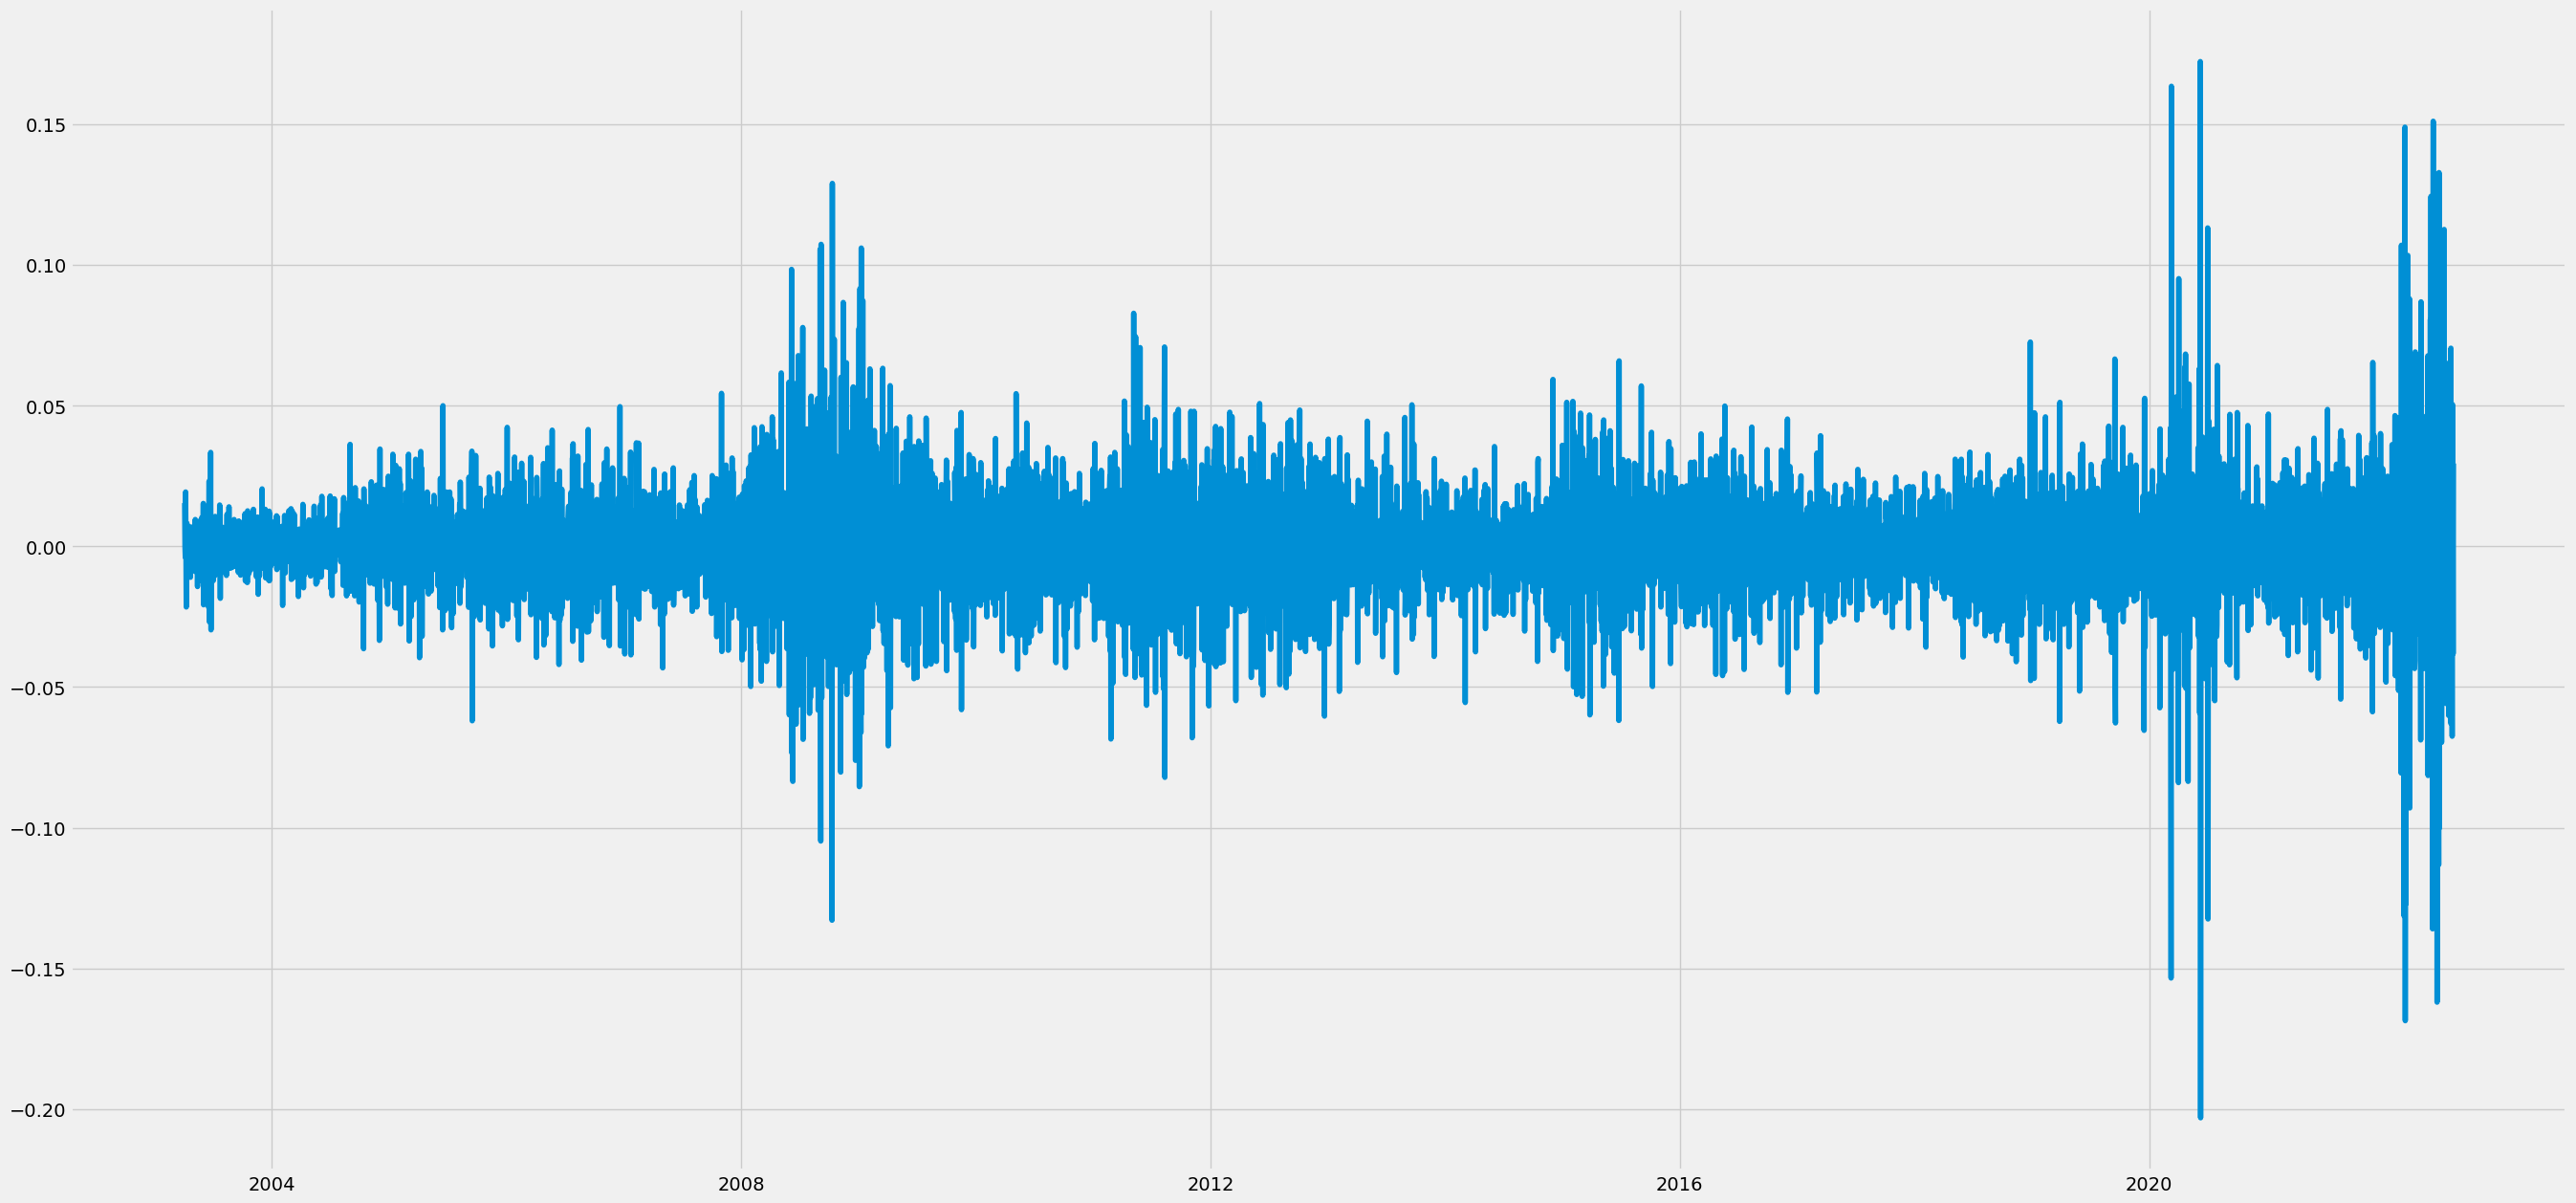

In [44]:
# plotting the data after third differencing
plt.figure(figsize = (30,15), dpi = 100)
plt.plot(data_diff_v3)

In [45]:
# checking dickey fuller test results
dickey_fuller(data_diff_v3)

Dickey Fuller Stationarity Test:
Test statistic                  -22.922558
p-value                           0.000000
Number of lags used              35.000000
Number of observations used    7027.000000
Critical value (1%)              -3.431281
Critical value (5%)              -2.861951
Critical value (10%)             -2.566989
dtype: float64


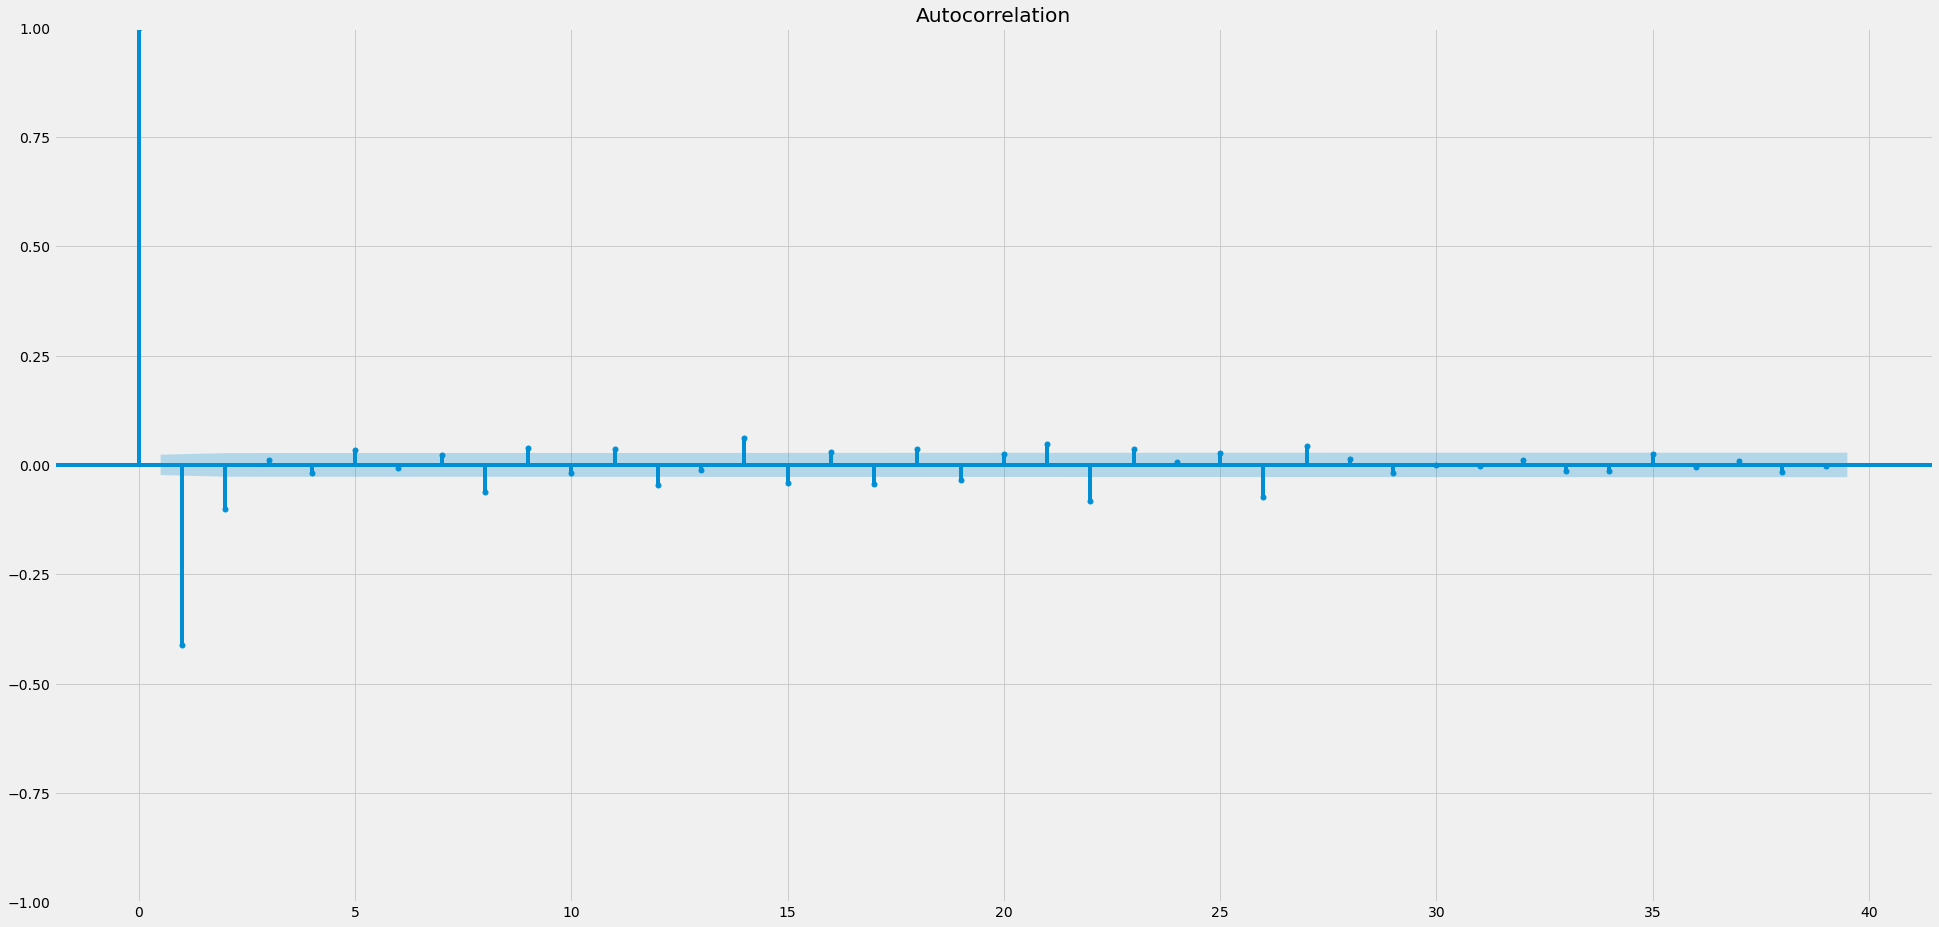

In [46]:
# checking autocorrelation
plot_acf(data_diff_v3)
plt.show()

### Differencing - 4

In [47]:
# differencing the fourth time
data_diff_v4 = data_diff_v3 - data_diff_v3.shift(1)
data_diff_v4.dropna(inplace = True)
data_diff_v4.head(20)

2003-04-06   -0.015385
2003-04-07   -0.003846
2003-04-08    0.023187
2003-04-09   -0.022527
2003-04-10   -0.018352
2003-04-11    0.022527
2003-04-12    0.007253
2003-04-13   -0.008242
2003-04-14    0.004286
2003-04-15   -0.010549
2003-04-16    0.004945
2003-04-17    0.008242
2003-04-18   -0.012198
2003-04-19    0.006923
2003-04-20   -0.001648
2003-04-21    0.002198
2003-04-22   -0.005385
2003-04-23   -0.007802
2003-04-24    0.017912
2003-04-25   -0.001319
Freq: D, Name: moving_average, dtype: float64

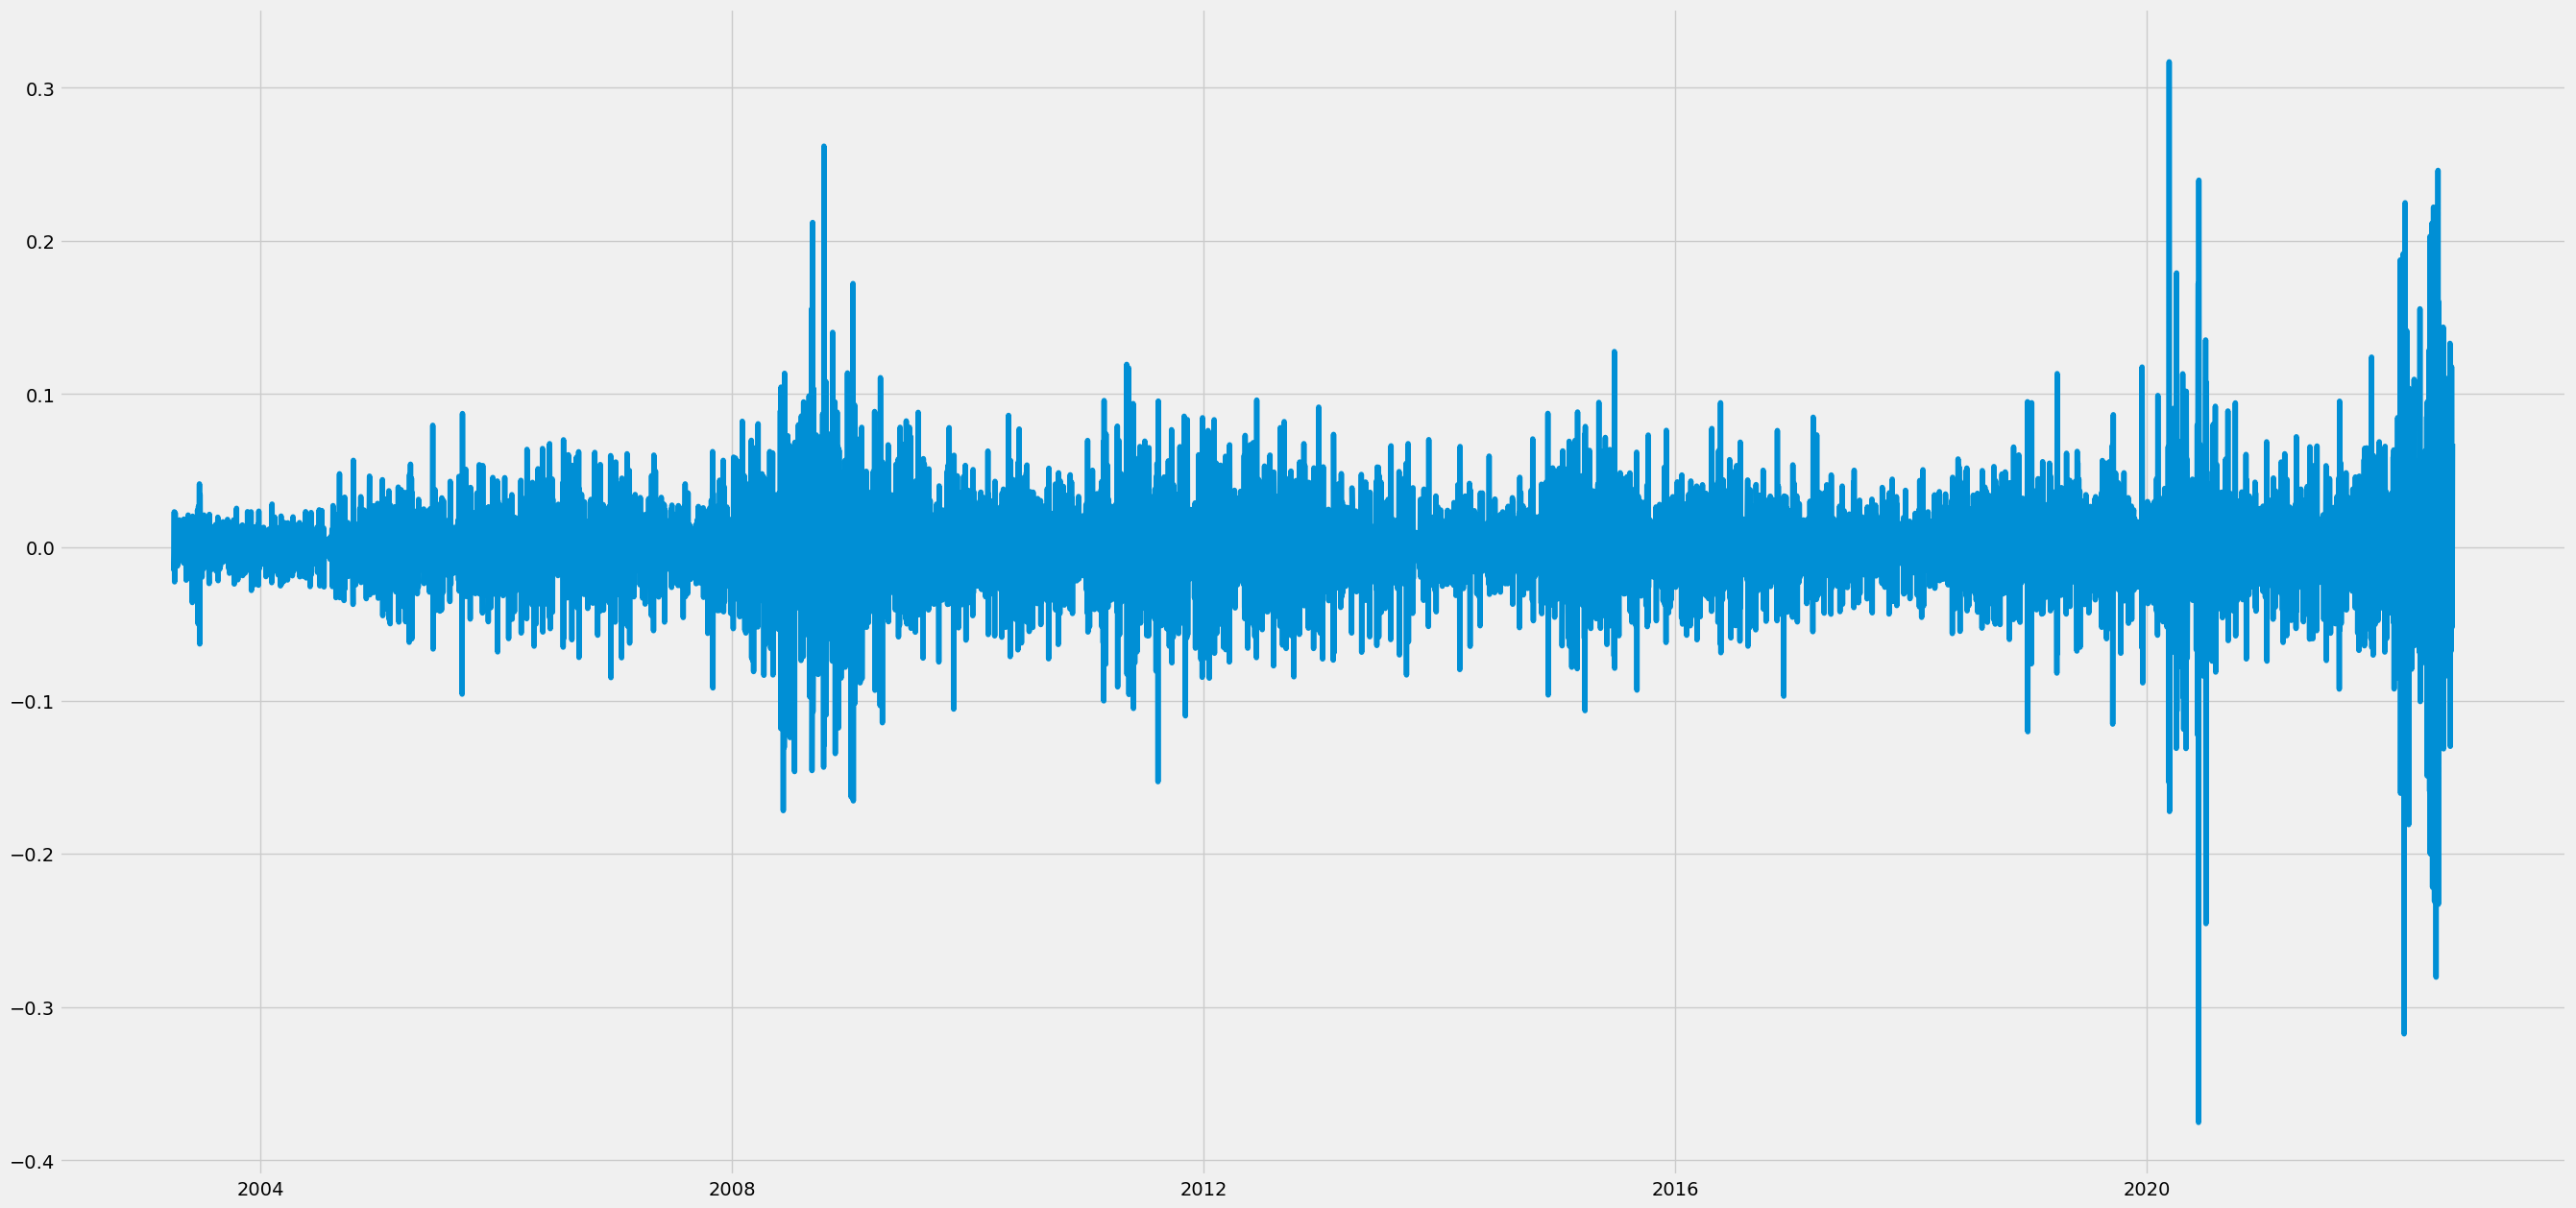

In [48]:
# plotting the data after fourth differencing
plt.figure(figsize = (30,15), dpi = 100)
plt.plot(data_diff_v4)

In [49]:
# checking dickey fuller test results
dickey_fuller(data_diff_v4)

Dickey Fuller Stationarity Test:
Test statistic                  -31.680789
p-value                           0.000000
Number of lags used              35.000000
Number of observations used    7026.000000
Critical value (1%)              -3.431281
Critical value (5%)              -2.861951
Critical value (10%)             -2.566989
dtype: float64


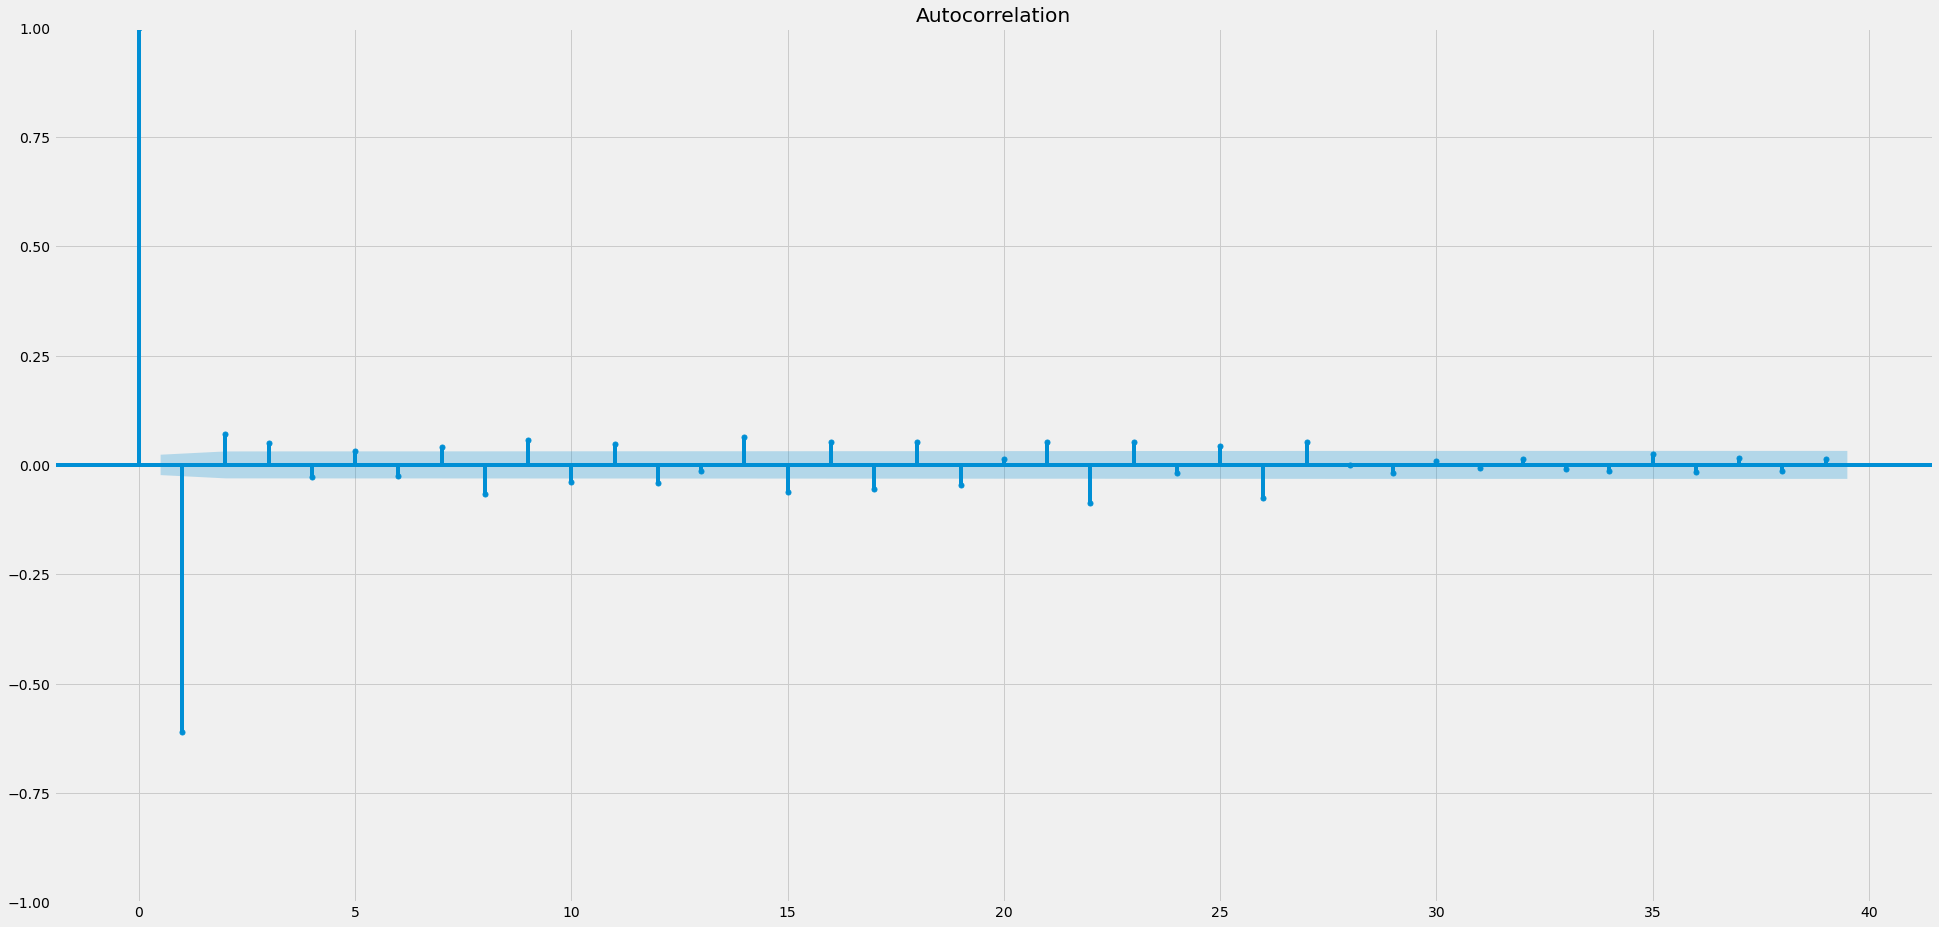

In [50]:
# checking autocorrelation
plot_acf(data_diff_v4)
plt.show()

### Differencing - 5

In [51]:
# differencing the fifth time
data_diff_v5 = data_diff_v4 - data_diff_v4.shift(1)
data_diff_v5.dropna(inplace = True)
data_diff_v5.head(20)

2003-04-07    0.011538
2003-04-08    0.027033
2003-04-09   -0.045714
2003-04-10    0.004176
2003-04-11    0.040879
2003-04-12   -0.015275
2003-04-13   -0.015495
2003-04-14    0.012527
2003-04-15   -0.014835
2003-04-16    0.015495
2003-04-17    0.003297
2003-04-18   -0.020440
2003-04-19    0.019121
2003-04-20   -0.008571
2003-04-21    0.003846
2003-04-22   -0.007582
2003-04-23   -0.002418
2003-04-24    0.025714
2003-04-25   -0.019231
2003-04-26   -0.004835
Freq: D, Name: moving_average, dtype: float64

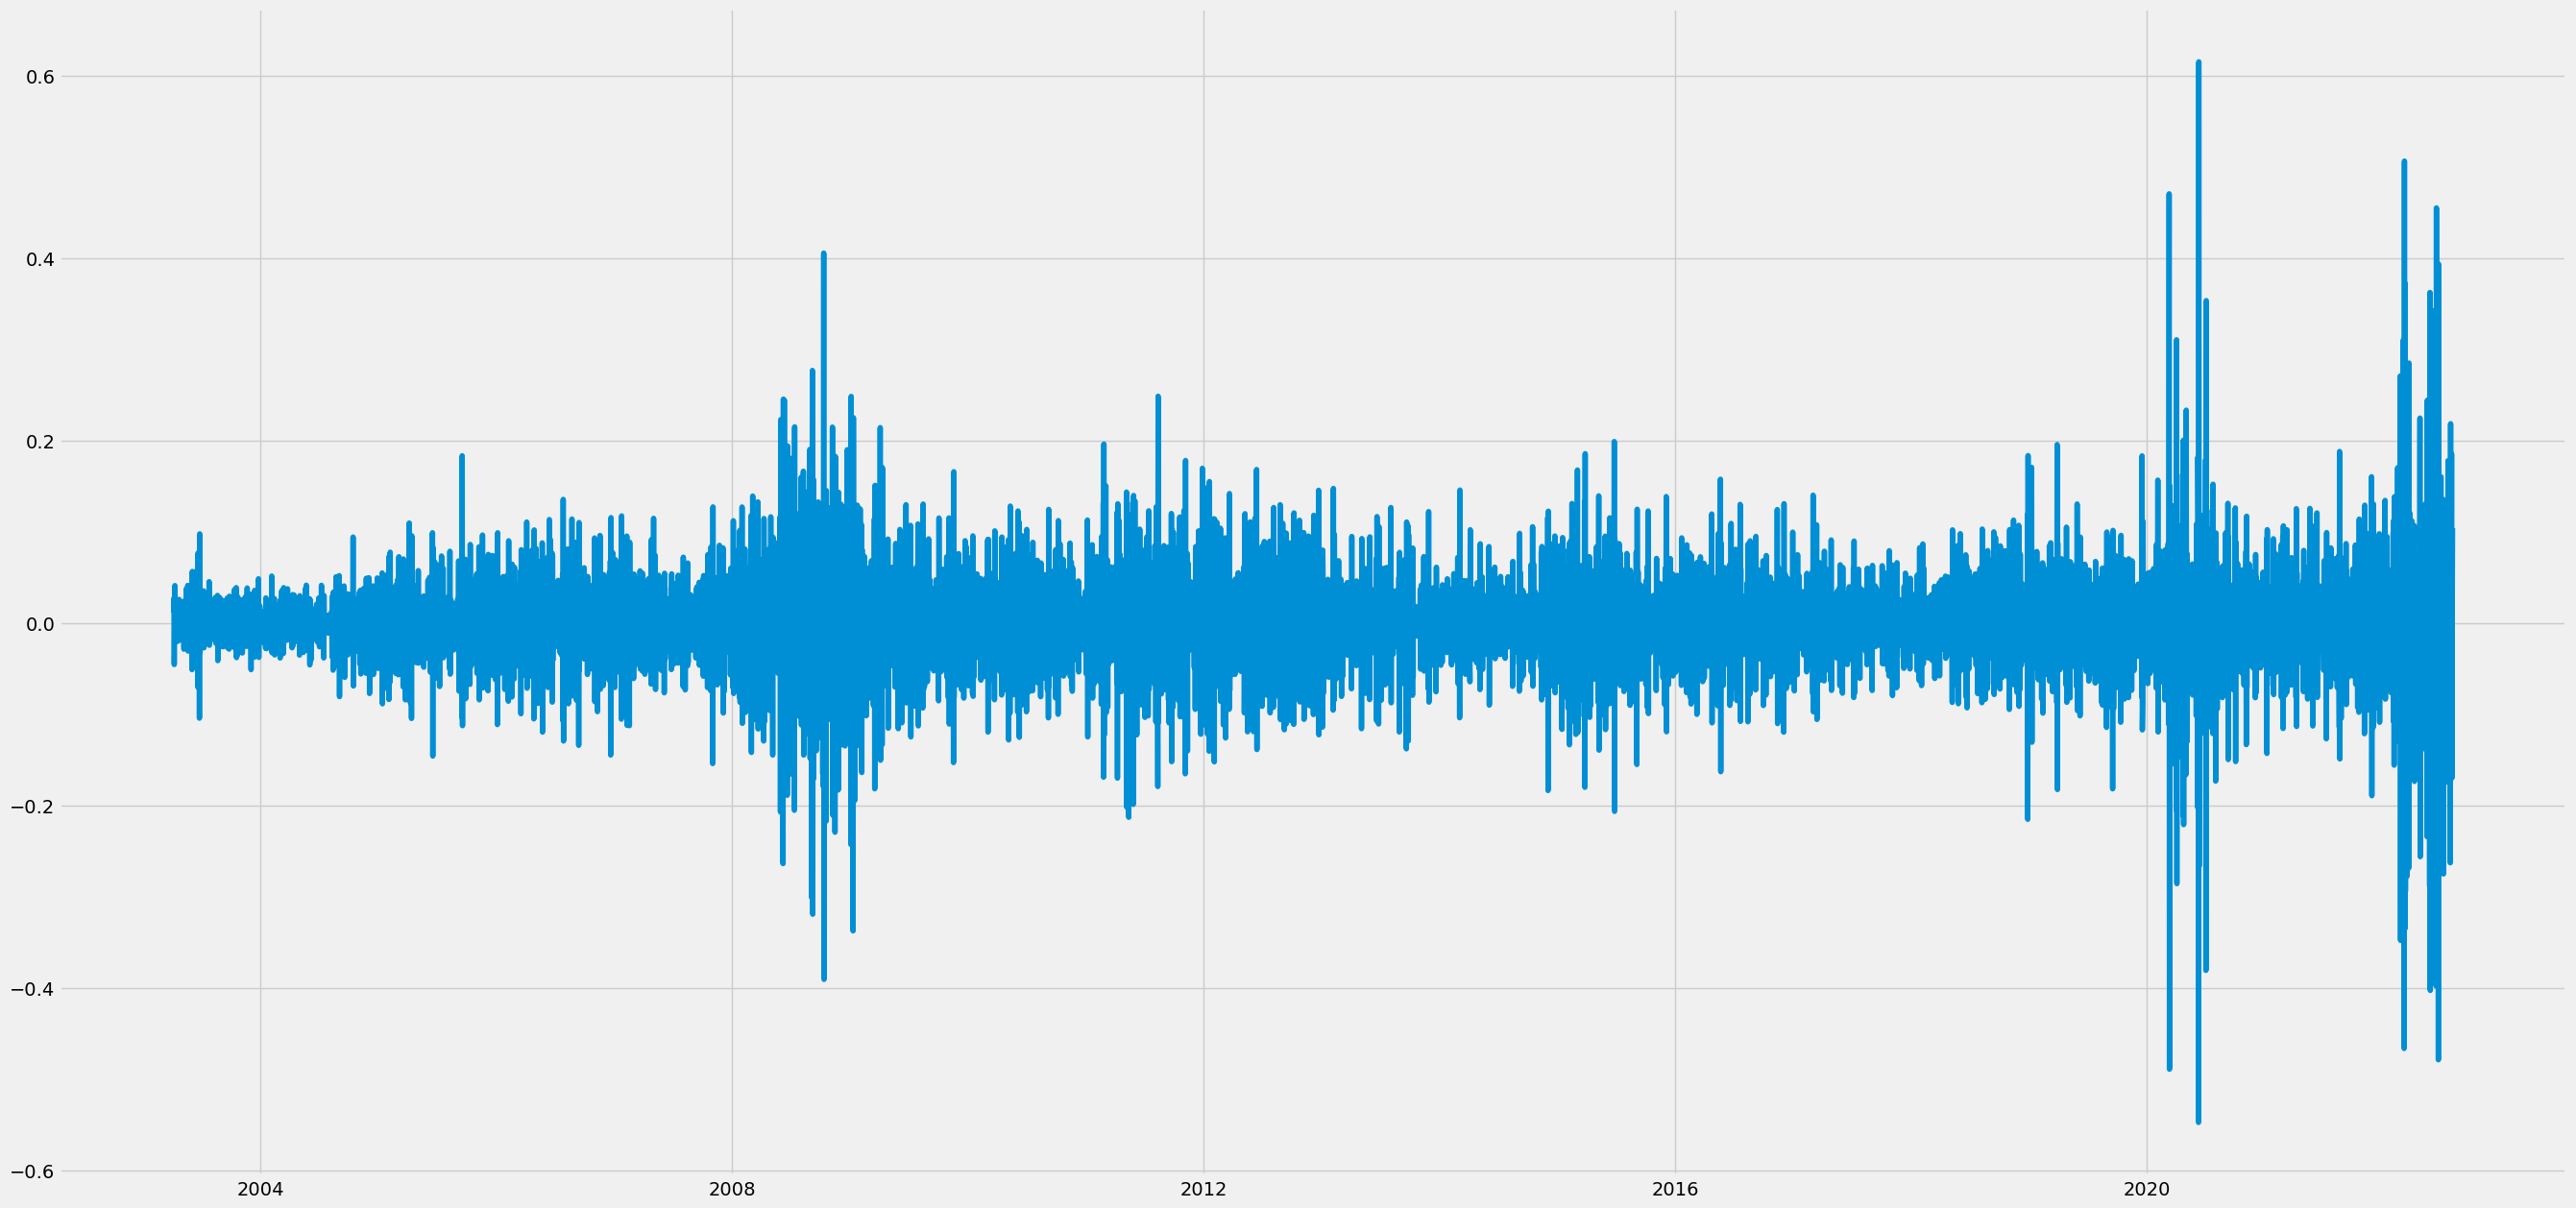

In [52]:
# plotting the data after fifth differencing
plt.figure(figsize = (30,15), dpi = 100)
plt.plot(data_diff_v5)

In [53]:
# checking dickey fuller test results
dickey_fuller(data_diff_v5)

Dickey Fuller Stationarity Test:
Test statistic                  -37.547860
p-value                           0.000000
Number of lags used              35.000000
Number of observations used    7025.000000
Critical value (1%)              -3.431281
Critical value (5%)              -2.861952
Critical value (10%)             -2.566989
dtype: float64


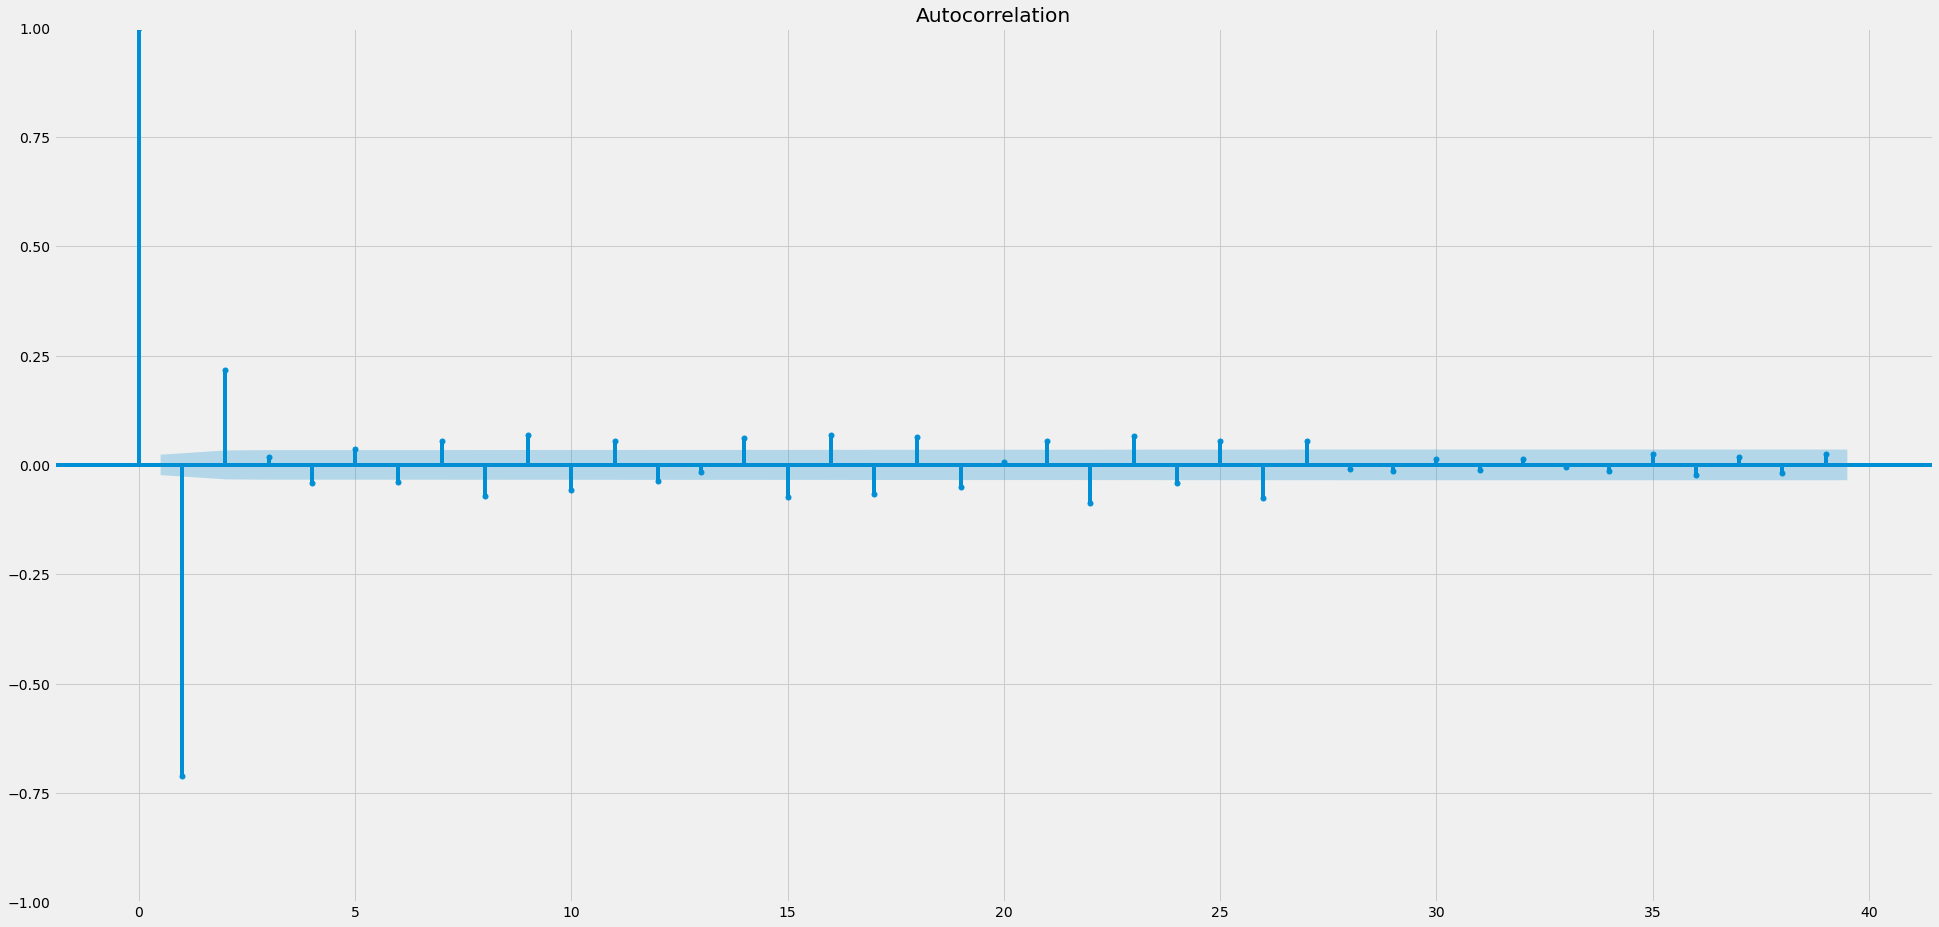

In [54]:
# checking autocorrelation
plot_acf(data_diff_v5)
plt.show()

## Final conclusion

Even after differencing 5 times the data still has too much autocorrelation. Therefore, it can be said that the data is not stationary enough for reliable forecasting.